# Main with Eccentricity
Dimensions used: Inclination, raan, eccentricity  
Files: clustering_utils_ecc.py, cluster_data_ecc.py

## KMeans with different k: Test with crossing data
KMeans normal bins and running bins

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
from kmeans import k_means
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData
import cluster_plotter

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_ecc.bin_data_for_clustering(running_ranges, print_res=False)

k_values = [3, 4, 5, 6, 7]

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\k_means_tests_running_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning K-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T

    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_kmeans, time_kmeans, n_clusters_kmeans, points_per_cluster_kmeans, metrics_kmeans = run_clustering(
            k_means, f"K-means (k={k})", normalized_data, data_min, data_max, k, plot=False, init='kmeans++'
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_kmeans.data, result_kmeans.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_kmeans.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"kmeans_{year_range}_k{k}.png")
        title = f"k-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_kmeans[4].items()}
        #rounded_square_density = {key: round(value, 3) for key, value in metrics_kmeans[5].items()}
        #rounded_hull_density = {key: round(value, 3) for key, value in metrics_kmeans[6].items()}

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_kmeans:.3f}",
            "Clusters": n_clusters_kmeans,
            "Points per Cluster": points_per_cluster_kmeans,
            "Davies-Bouldin": f"{metrics_kmeans[0]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_kmeans[1]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[1], (int, float)) else None,
            "Dunn Index": f"{metrics_kmeans[2]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_kmeans[3]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None 
        })

    df = pd.DataFrame(results)
    display(df)
    print(binned_data)


Running K-Means for Year Range: 2002-2005
Runtime for k_means: 0.033404 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k3.png
Runtime for k_means: 0.047984 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k4.png
Runtime for k_means: 0.074845 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k5.png
Runtime for k_means: 0.046157 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k6.png
Runtime for k_means: 0.225814 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,3,0.033,3,"{0: 15275, 1: 3862, 2: 2382}",0.606,61809.745,0.006,0.526,"{0: (0.041, 0.077, 0.134), 1: (0.092, 0.116, 0..."
1,2002-2005,4,0.048,4,"{0: 241, 1: 3670, 2: 15272, 3: 2336}",0.694,44490.179,0.003,0.621,"{0: (0.096, 0.115, 0.205), 1: (0.07, 0.092, 0...."
2,2002-2005,5,0.075,5,"{0: 10035, 1: 409, 2: 3845, 3: 2378, 4: 4852}",0.718,49038.007,0.001,0.517,"{0: (0.029, 0.038, 0.061), 1: (0.024, 0.07, 0...."
3,2002-2005,6,0.046,6,"{0: 4850, 1: 1947, 2: 10036, 3: 1675, 4: 2603,...",0.822,48340.780,0.001,0.489,"{0: (0.021, 0.044, 0.139), 1: (0.088, 0.101, 0..."
4,2002-2005,7,0.226,7,"{0: 1821, 1: 4849, 2: 217, 3: 408, 4: 10033, 5...",0.775,45198.496,0.001,0.495,"{0: (0.078, 0.088, 0.101), 1: (0.021, 0.044, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k3.png
Runtime for k_means: 0.057911 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k4.png
Runtime for k_means: 0.080335 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k5.png
Runtime for k_means: 0.145435 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k6.png
Runtime for k_means: 0.220935 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,0.041,3,"{0: 2320, 1: 18026, 2: 3792}",0.656,59952.957,0.002,0.523,"{0: (0.121, 0.127, 0.148), 1: (0.041, 0.068, 0..."
1,2003-2006,4,0.058,4,"{0: 7427, 1: 2308, 2: 10614, 3: 3789}",0.825,56115.084,0.001,0.382,"{0: (0.042, 0.095, 0.13), 1: (0.119, 0.125, 0...."
2,2003-2006,5,0.080,5,"{0: 7138, 1: 3787, 2: 10103, 3: 809, 4: 2301}",0.722,53360.070,0.002,0.512,"{0: (0.038, 0.042, 0.099), 1: (0.102, 0.129, 0..."
3,2003-2006,6,0.145,6,"{0: 1425, 1: 7032, 2: 5649, 3: 347, 4: 8779, 5...",0.944,25589.730,0.001,0.457,"{0: (0.043, 0.061, 0.076), 1: (0.037, 0.04, 0...."
4,2003-2006,7,0.221,7,"{0: 2252, 1: 408, 2: 2202, 3: 1621, 4: 10009, ...",0.739,52908.350,0.004,0.508,"{0: (0.086, 0.102, 0.123), 1: (0.032, 0.086, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k3.png
Runtime for k_means: 0.066842 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k4.png
Runtime for k_means: 0.057679 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k5.png
Runtime for k_means: 0.205723 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k6.png
Runtime for k_means: 0.451844 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,0.038,3,"{0: 10471, 1: 4999, 2: 8524}",0.650,49379.480,0.001,0.328,"{0: (0.031, 0.04, 0.059), 1: (0.102, 0.133, 0...."
1,2004-2007,4,0.067,4,"{0: 776, 1: 18201, 2: 1696, 3: 3321}",0.669,48860.562,0.007,0.548,"{0: (0.051, 0.09, 0.135), 1: (0.038, 0.057, 0...."
2,2004-2007,5,0.058,5,"{0: 643, 1: 10081, 2: 3327, 3: 1692, 4: 8251}",0.683,52546.098,0.002,0.539,"{0: (0.025, 0.075, 0.101), 1: (0.029, 0.037, 0..."
3,2004-2007,6,0.206,6,"{0: 10046, 1: 3299, 2: 7952, 3: 366, 4: 643, 5...",0.629,49279.295,0.002,0.557,"{0: (0.029, 0.037, 0.058), 1: (0.091, 0.126, 0..."
4,2004-2007,7,0.452,7,"{0: 1991, 1: 1790, 2: 7952, 3: 643, 4: 1218, 5...",0.735,50972.038,0.002,0.537,"{0: (0.089, 0.094, 0.143), 1: (0.084, 0.098, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k3.png
Runtime for k_means: 0.051111 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k4.png
Runtime for k_means: 0.055685 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k5.png
Runtime for k_means: 0.141759 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k6.png
Runtime for k_means: 0.367923 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,3,0.087,3,"{0: 2748, 1: 17201, 2: 1524}",0.708,44833.220,0.005,0.533,"{0: (0.103, 0.126, 0.144), 1: (0.039, 0.065, 0..."
1,2005-2008,4,0.051,4,"{0: 16588, 1: 1522, 2: 634, 3: 2729}",0.685,40409.331,0.006,0.542,"{0: (0.038, 0.06, 0.11), 1: (0.112, 0.141, 0.1..."
2,2005-2008,5,0.056,5,"{0: 530, 1: 9249, 2: 7444, 3: 1528, 4: 2722}",0.681,45921.136,0.003,0.555,"{0: (0.026, 0.075, 0.105), 1: (0.028, 0.038, 0..."
3,2005-2008,6,0.142,6,"{0: 9531, 1: 1005, 2: 1689, 3: 7387, 4: 1534, ...",0.824,38653.600,0.002,0.529,"{0: (0.029, 0.04, 0.059), 1: (0.099, 0.129, 0...."
4,2005-2008,7,0.368,7,"{0: 7387, 1: 331, 2: 1593, 3: 219, 4: 946, 5: ...",0.775,36366.225,0.002,0.534,"{0: (0.022, 0.039, 0.119), 1: (0.053, 0.125, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k3.png
Runtime for k_means: 0.059496 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k4.png
Runtime for k_means: 0.084779 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k5.png
Runtime for k_means: 0.101823 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k6.png
Runtime for k_means: 0.102181 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,3,0.035,3,"{0: 17662, 1: 1592, 2: 2512}",0.739,42757.045,0.004,0.527,"{0: (0.04, 0.074, 0.139), 1: (0.118, 0.144, 0...."
1,2006-2009,4,0.059,4,"{0: 1580, 1: 9597, 2: 2509, 3: 8080}",0.777,48190.986,0.002,0.442,"{0: (0.113, 0.144, 0.15), 1: (0.031, 0.04, 0.0..."
2,2006-2009,5,0.085,5,"{0: 9597, 1: 1332, 2: 1740, 3: 8073, 4: 1024}",0.889,41465.428,0.002,0.527,"{0: (0.031, 0.04, 0.061), 1: (0.088, 0.121, 0...."
3,2006-2009,6,0.102,6,"{0: 9322, 1: 2488, 2: 7695, 3: 1553, 4: 374, 5...",0.649,42428.705,0.004,0.575,"{0: (0.029, 0.039, 0.059), 1: (0.085, 0.13, 0...."
4,2006-2009,7,0.102,7,"{0: 970, 1: 7799, 2: 1225, 3: 9537, 4: 215, 5:...",0.744,40090.257,0.002,0.555,"{0: (0.085, 0.103, 0.13), 1: (0.026, 0.038, 0...."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k3.png
Runtime for k_means: 0.056173 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k4.png
Runtime for k_means: 0.066678 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k5.png
Runtime for k_means: 0.377722 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k6.png
Runtime for k_means: 0.068801 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,3,0.016,3,"{0: 2840, 1: 6625, 2: 7599}",0.570,35612.190,0.002,0.379,"{0: (0.098, 0.137, 0.259), 1: (0.042, 0.086, 0..."
1,2007-2010,4,0.056,4,"{0: 7596, 1: 1239, 2: 1617, 3: 6612}",0.770,34936.914,0.003,0.454,"{0: (0.031, 0.04, 0.063), 1: (0.106, 0.141, 0...."
2,2007-2010,5,0.067,5,"{0: 6610, 1: 1160, 2: 725, 3: 973, 4: 7596}",0.868,29735.947,0.003,0.544,"{0: (0.038, 0.085, 0.121), 1: (0.078, 0.086, 0..."
3,2007-2010,6,0.378,6,"{0: 374, 1: 1233, 2: 214, 3: 7429, 4: 6217, 5:...",0.659,33460.194,0.002,0.592,"{0: (0.034, 0.106, 0.128), 1: (0.102, 0.142, 0..."
4,2007-2010,7,0.069,7,"{0: 7390, 1: 2773, 2: 296, 3: 115, 4: 6049, 5:...",0.802,17670.401,0.003,0.593,"{0: (0.03, 0.04, 0.062), 1: (0.08, 0.138, 0.25..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k3.png
Runtime for k_means: 0.048504 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k4.png
Runtime for k_means: 0.111343 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k5.png
Runtime for k_means: 0.063656 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k6.png
Runtime for k_means: 0.127391 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,3,0.037,3,"{0: 4742, 1: 5719, 2: 2099}",0.573,25322.772,0.004,0.392,"{0: (0.044, 0.071, 0.141), 1: (0.031, 0.041, 0..."
1,2008-2011,4,0.049,4,"{0: 5719, 1: 1001, 2: 4727, 3: 1113}",0.770,24569.677,0.005,0.468,"{0: (0.03, 0.041, 0.066), 1: (0.104, 0.137, 0...."
2,2008-2011,5,0.111,5,"{0: 1106, 1: 4443, 2: 987, 3: 372, 4: 5652}",0.626,28551.273,0.003,0.608,"{0: (0.09, 0.136, 0.143), 1: (0.029, 0.039, 0...."
3,2008-2011,6,0.064,6,"{0: 4443, 1: 935, 2: 372, 3: 5652, 4: 1040, 5:...",0.615,26671.001,0.003,0.614,"{0: (0.029, 0.039, 0.074), 1: (0.076, 0.105, 0..."
4,2008-2011,7,0.127,7,"{0: 4371, 1: 580, 2: 844, 3: 677, 4: 5048, 5: ...",0.814,24858.024,0.003,0.536,"{0: (0.028, 0.038, 0.072), 1: (0.102, 0.115, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k3.png
Runtime for k_means: 0.064137 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k4.png
Runtime for k_means: 0.091968 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k5.png
Runtime for k_means: 0.063994 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k6.png
Runtime for k_means: 0.118970 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,3,0.025,3,"{0: 5033, 1: 4128, 2: 1873}",0.572,22687.826,0.002,0.395,"{0: (0.031, 0.041, 0.066), 1: (0.045, 0.07, 0...."
1,2009-2012,4,0.064,4,"{0: 4112, 1: 902, 2: 986, 3: 5034}",0.756,22349.877,0.003,0.471,"{0: (0.04, 0.069, 0.14), 1: (0.096, 0.132, 0.1..."
2,2009-2012,5,0.092,5,"{0: 1644, 1: 986, 2: 902, 3: 3542, 4: 3960}",0.935,17980.211,0.002,0.409,"{0: (0.039, 0.048, 0.052), 1: (0.106, 0.131, 0..."
3,2009-2012,6,0.064,6,"{0: 813, 1: 330, 2: 932, 3: 4981, 4: 147, 5: 3...",0.792,22361.387,0.002,0.604,"{0: (0.095, 0.132, 0.145), 1: (0.028, 0.046, 0..."
4,2009-2012,7,0.119,7,"{0: 3594, 1: 575, 2: 236, 3: 1019, 4: 353, 5: ...",0.820,20487.753,0.003,0.535,"{0: (0.023, 0.029, 0.049), 1: (0.034, 0.067, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k3.png
Runtime for k_means: 0.020072 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k4.png
Runtime for k_means: 0.011834 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k5.png
Runtime for k_means: 0.136374 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k6.png
Runtime for k_means: 0.060528 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,3,0.028,3,"{0: 463, 1: 4273, 2: 348}",0.749,6583.799,0.011,0.498,"{0: (0.097, 0.136, 0.168), 1: (0.039, 0.097, 0..."
1,2010-2013,4,0.020,4,"{0: 347, 1: 1946, 2: 463, 3: 2328}",0.777,9133.278,0.004,0.468,"{0: (0.105, 0.135, 0.153), 1: (0.038, 0.073, 0..."
2,2010-2013,5,0.012,5,"{0: 2293, 1: 442, 2: 219, 3: 365, 4: 1765}",0.616,11378.070,0.006,0.622,"{0: (0.031, 0.039, 0.068), 1: (0.091, 0.132, 0..."
3,2010-2013,6,0.136,6,"{0: 268, 1: 798, 2: 219, 3: 77, 4: 1686, 5: 2036}",0.730,6406.069,0.003,0.571,"{0: (0.035, 0.067, 0.09), 1: (0.09, 0.146, 0.2..."
4,2010-2013,7,0.061,7,"{0: 2037, 1: 333, 2: 1745, 3: 207, 4: 219, 5: ...",0.794,10092.023,0.002,0.541,"{0: (0.023, 0.032, 0.051), 1: (0.083, 0.091, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k3.png
Runtime for k_means: 0.006024 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k4.png
Runtime for k_means: 0.006597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k5.png
Runtime for k_means: 0.014239 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k6.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3,0.000,3,"{0: 1085, 1: 1317, 2: 448}",0.573,5819.275,0.008,0.405,"{0: (0.048, 0.076, 0.152), 1: (0.029, 0.039, 0..."
1,2011-2014,4,0.006,4,"{0: 214, 1: 1317, 2: 1081, 3: 238}",0.796,5229.001,0.009,0.476,"{0: (0.109, 0.138, 0.155), 1: (0.029, 0.039, 0..."
2,2011-2014,5,0.007,5,"{0: 1306, 1: 147, 2: 212, 3: 235, 4: 950}",0.636,6423.510,0.006,0.630,"{0: (0.031, 0.04, 0.068), 1: (0.055, 0.071, 0...."
3,2011-2014,6,0.014,6,"{0: 872, 1: 226, 2: 99, 3: 1285, 4: 221, 5: 147}",0.767,5561.520,0.006,0.582,"{0: (0.027, 0.028, 0.055), 1: (0.081, 0.14, 0...."
4,2011-2014,7,0.000,7,"{0: 1306, 1: 94, 2: 948, 3: 135, 4: 194, 5: 26...",0.644,6020.314,0.006,0.633,"{0: (0.031, 0.04, 0.068), 1: (0.096, 0.104, 0...."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k3.png
Runtime for k_means: 0.018473 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k4.png
Runtime for k_means: 0.010478 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k5.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k6.png
Runtime for k_means: 0.015854 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,3,0.014,3,"{0: 511, 1: 1145, 2: 891}",0.682,5061.782,0.006,0.355,"{0: (0.089, 0.151, 0.247), 1: (0.03, 0.047, 0...."
1,2012-2015,4,0.018,4,"{0: 1145, 1: 205, 2: 887, 3: 310}",0.843,4686.679,0.007,0.426,"{0: (0.03, 0.047, 0.087), 1: (0.108, 0.134, 0...."
2,2012-2015,5,0.010,5,"{0: 290, 1: 309, 2: 205, 3: 1135, 4: 608}",0.673,5405.902,0.003,0.589,"{0: (0.045, 0.081, 0.084), 1: (0.079, 0.127, 0..."
3,2012-2015,6,0.000,6,"{0: 181, 1: 608, 2: 297, 3: 36, 4: 290, 5: 1135}",0.623,5205.415,0.003,0.599,"{0: (0.086, 0.114, 0.142), 1: (0.031, 0.038, 0..."
4,2012-2015,7,0.016,7,"{0: 355, 1: 187, 2: 845, 3: 194, 4: 830, 5: 27...",1.049,2895.844,0.004,0.333,"{0: (0.023, 0.052, 0.078), 1: (0.059, 0.081, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k3.png
Runtime for k_means: 0.012241 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k4.png
Runtime for k_means: 0.010967 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k5.png
Runtime for k_means: 0.015213 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k6.png
Runtime for k_means: 0.011750 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,3,0.016,3,"{0: 350, 1: 2704, 2: 602}",0.940,3922.627,0.014,0.369,"{0: (0.09, 0.117, 0.172), 1: (0.049, 0.125, 0...."
1,2013-2016,4,0.012,4,"{0: 943, 1: 1061, 2: 450, 3: 1202}",0.506,4933.449,0.007,0.481,"{0: (0.116, 0.186, 0.233), 1: (0.032, 0.046, 0..."
2,2013-2016,5,0.011,5,"{0: 265, 1: 443, 2: 2242, 3: 340, 4: 366}",0.751,3665.173,0.016,0.476,"{0: (0.098, 0.11, 0.146), 1: (0.054, 0.071, 0...."
3,2013-2016,6,0.015,6,"{0: 1059, 1: 366, 2: 339, 3: 265, 4: 444, 5: 1...",0.620,6610.176,0.008,0.591,"{0: (0.031, 0.039, 0.083), 1: (0.072, 0.082, 0..."
4,2013-2016,7,0.012,7,"{0: 442, 1: 52, 2: 1183, 3: 1059, 4: 362, 5: 2...",0.623,6356.301,0.009,0.602,"{0: (0.044, 0.053, 0.106), 1: (0.075, 0.096, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k4.png
Runtime for k_means: 0.016192 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k5.png
Runtime for k_means: 0.013795 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k6.png
Runtime for k_means: 0.007601 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,3,0.012,3,"{0: 3588, 1: 951, 2: 593}",0.939,5664.575,0.007,0.341,"{0: (0.051, 0.139, 0.196), 1: (0.082, 0.124, 0..."
1,2014-2017,4,0.000,4,"{0: 1357, 1: 2233, 2: 949, 3: 593}",0.946,6624.303,0.003,0.350,"{0: (0.046, 0.064, 0.099), 1: (0.045, 0.091, 0..."
2,2014-2017,5,0.016,5,"{0: 584, 1: 2233, 2: 881, 3: 79, 4: 1355}",0.950,5347.589,0.003,0.450,"{0: (0.082, 0.09, 0.169), 1: (0.045, 0.091, 0...."
3,2014-2017,6,0.014,6,"{0: 577, 1: 1327, 2: 270, 3: 346, 4: 2226, 5: ...",0.828,5792.431,0.007,0.473,"{0: (0.054, 0.077, 0.148), 1: (0.042, 0.044, 0..."
4,2014-2017,7,0.008,7,"{0: 557, 1: 1430, 2: 106, 3: 583, 4: 432, 5: 1...",0.678,8403.021,0.003,0.585,"{0: (0.067, 0.083, 0.138), 1: (0.033, 0.043, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k3.png
Runtime for k_means: 0.012302 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k4.png
Runtime for k_means: 0.020266 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k5.png
Runtime for k_means: 0.020528 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k6.png
Runtime for k_means: 0.030073 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,3,0.008,3,"{0: 1590, 1: 2117, 2: 3260}",0.709,9766.849,0.002,0.297,"{0: (0.047, 0.069, 0.101), 1: (0.112, 0.18, 0...."
1,2015-2018,4,0.012,4,"{0: 952, 1: 1244, 2: 911, 3: 3860}",0.846,7558.676,0.018,0.349,"{0: (0.045, 0.055, 0.109), 1: (0.076, 0.094, 0..."
2,2015-2018,5,0.020,5,"{0: 715, 1: 3260, 2: 1542, 3: 569, 4: 881}",0.763,9415.692,0.003,0.505,"{0: (0.07, 0.085, 0.142), 1: (0.041, 0.085, 0...."
3,2015-2018,6,0.021,6,"{0: 875, 1: 1523, 2: 953, 3: 563, 4: 713, 5: 2...",0.638,13126.247,0.003,0.597,"{0: (0.055, 0.075, 0.138), 1: (0.043, 0.045, 0..."
4,2015-2018,7,0.030,7,"{0: 563, 1: 760, 2: 866, 3: 1071, 4: 936, 5: 7...",0.730,12306.335,0.006,0.535,"{0: (0.091, 0.112, 0.135), 1: (0.042, 0.059, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k4.png
Runtime for k_means: 0.011176 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k5.png
Runtime for k_means: 0.041594 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k6.png
Runtime for k_means: 0.050566 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,3,0.014,3,"{0: 4997, 1: 1172, 2: 1088}",0.707,8426.872,0.027,0.337,"{0: (0.04, 0.139, 0.183), 1: (0.074, 0.095, 0...."
1,2016-2019,4,0.000,4,"{0: 2538, 1: 1462, 2: 2198, 3: 1059}",0.539,8946.700,0.002,0.480,"{0: (0.033, 0.045, 0.074), 1: (0.045, 0.064, 0..."
2,2016-2019,5,0.011,5,"{0: 1429, 1: 1073, 2: 2537, 3: 1166, 4: 1052}",0.623,11619.041,0.002,0.595,"{0: (0.042, 0.046, 0.101), 1: (0.056, 0.084, 0..."
3,2016-2019,6,0.042,6,"{0: 2536, 1: 1050, 2: 537, 3: 1050, 4: 1429, 5...",0.647,13188.177,0.003,0.601,"{0: (0.033, 0.044, 0.074), 1: (0.049, 0.07, 0...."
4,2016-2019,7,0.051,7,"{0: 2536, 1: 107, 2: 517, 3: 1050, 4: 1429, 5:...",0.663,12547.036,0.003,0.610,"{0: (0.033, 0.044, 0.074), 1: (0.083, 0.111, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k3.png
Runtime for k_means: 0.003488 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k4.png
Runtime for k_means: 0.084027 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k5.png
Runtime for k_means: 0.033180 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k6.png
Runtime for k_means: 0.028340 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,3,0.030,3,"{0: 2247, 1: 3974, 2: 2580}",0.761,11521.191,0.003,0.281,"{0: (0.044, 0.061, 0.107), 1: (0.04, 0.083, 0...."
1,2017-2020,4,0.003,4,"{0: 2813, 1: 2166, 2: 2570, 3: 1252}",0.539,11110.122,0.002,0.479,"{0: (0.035, 0.045, 0.072), 1: (0.038, 0.054, 0..."
2,2017-2020,5,0.084,5,"{0: 2140, 1: 1375, 2: 1246, 3: 1232, 4: 2808}",0.630,14023.469,0.003,0.590,"{0: (0.037, 0.04, 0.104), 1: (0.073, 0.095, 0...."
3,2017-2020,6,0.033,6,"{0: 2579, 1: 1232, 2: 1240, 3: 1375, 4: 1047, ...",0.697,12375.277,0.002,0.530,"{0: (0.034, 0.045, 0.061), 1: (0.059, 0.078, 0..."
4,2017-2020,7,0.028,7,"{0: 1110, 1: 2613, 2: 135, 3: 1240, 4: 1127, 5...",0.794,11420.020,0.002,0.537,"{0: (0.035, 0.045, 0.062), 1: (0.034, 0.044, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k3.png
Runtime for k_means: 0.014686 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k4.png
Runtime for k_means: 0.015553 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k5.png
Runtime for k_means: 0.017080 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k6.png
Runtime for k_means: 0.019639 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,3,0.005,3,"{0: 5492, 1: 2500, 2: 1304}",0.774,10621.440,0.037,0.282,"{0: (0.036, 0.044, 0.189), 1: (0.106, 0.197, 0..."
1,2018-2021,4,0.015,4,"{0: 4197, 1: 1389, 2: 2566, 3: 1144}",0.836,11403.533,0.004,0.378,"{0: (0.043, 0.084, 0.174), 1: (0.072, 0.089, 0..."
2,2018-2021,5,0.016,5,"{0: 2434, 1: 1389, 2: 1138, 3: 3046, 4: 1289}",0.664,14004.453,0.003,0.577,"{0: (0.037, 0.039, 0.103), 1: (0.072, 0.089, 0..."
3,2018-2021,6,0.017,6,"{0: 3049, 1: 989, 2: 2422, 3: 1136, 4: 1389, 5...",0.719,12169.259,0.003,0.577,"{0: (0.032, 0.043, 0.071), 1: (0.023, 0.044, 0..."
4,2018-2021,7,0.020,7,"{0: 1389, 1: 1288, 2: 1136, 3: 2789, 4: 311, 5...",0.766,11286.634,0.005,0.522,"{0: (0.072, 0.089, 0.261), 1: (0.025, 0.038, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k3.png
Runtime for k_means: 0.013641 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k4.png
Runtime for k_means: 0.001532 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k5.png
Runtime for k_means: 0.019198 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k6.png
Runtime for k_means: 0.050860 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,3,0.010,3,"{0: 2536, 1: 4206, 2: 3390}",0.804,12334.074,0.005,0.269,"{0: (0.111, 0.204, 0.228), 1: (0.045, 0.099, 0..."
1,2019-2022,4,0.014,4,"{0: 1944, 1: 2528, 2: 2489, 3: 3171}",0.579,12642.653,0.001,0.461,"{0: (0.05, 0.071, 0.136), 1: (0.11, 0.204, 0.2..."
2,2019-2022,5,0.002,5,"{0: 3357, 1: 4194, 2: 974, 3: 1007, 4: 600}",0.775,10969.359,0.007,0.485,"{0: (0.035, 0.037, 0.099), 1: (0.042, 0.099, 0..."
3,2019-2022,6,0.019,6,"{0: 3357, 1: 972, 2: 4194, 3: 117, 4: 932, 5: ...",0.803,9268.224,0.007,0.490,"{0: (0.035, 0.037, 0.099), 1: (0.063, 0.08, 0...."
4,2019-2022,7,0.051,7,"{0: 2492, 1: 596, 2: 969, 3: 561, 4: 1000, 5: ...",0.665,16624.242,0.005,0.589,"{0: (0.037, 0.046, 0.08), 1: (0.1, 0.137, 0.14..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k3.png
Runtime for k_means: 0.016541 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k4.png
Runtime for k_means: 0.031687 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k5.png
Runtime for k_means: 0.037308 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k6.png
Runtime for k_means: 0.098703 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,3,0.000,3,"{0: 5592, 1: 3764, 2: 3165}",0.794,14735.071,0.002,0.259,"{0: (0.046, 0.1, 0.202), 1: (0.038, 0.047, 0.0..."
1,2020-2023,4,0.017,4,"{0: 3350, 1: 2500, 2: 3157, 3: 3514}",0.583,15749.677,0.003,0.463,"{0: (0.034, 0.047, 0.082), 1: (0.052, 0.075, 0..."
2,2020-2023,5,0.032,5,"{0: 6813, 1: 1105, 2: 2507, 3: 908, 4: 1188}",0.759,13055.492,0.010,0.510,"{0: (0.034, 0.04, 0.189), 1: (0.064, 0.082, 0...."
3,2020-2023,6,0.037,6,"{0: 1187, 1: 3485, 2: 3348, 3: 1179, 4: 2492, ...",0.648,20755.373,0.005,0.583,"{0: (0.065, 0.082, 0.151), 1: (0.035, 0.036, 0..."
4,2020-2023,7,0.099,7,"{0: 3009, 1: 2445, 2: 910, 3: 1181, 4: 1105, 5...",0.700,18873.243,0.003,0.501,"{0: (0.035, 0.045, 0.073), 1: (0.03, 0.037, 0...."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

## Mean Shift for binned years and different bandwidths

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from mean_shift import mean_shift_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_ecc.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\mean_shift_tests_running_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Mean Shift for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T

    normalized_data, data_min, data_max = normalize_data(data_array)

    bandwidths = [0.08, 0.1,0.14]

    results = []

    for b in bandwidths:
        result_mean_shift, time_mean_shift, n_clusters_mean_shift, points_per_cluster_mean_shift, metrics_mean_shift = run_clustering(
            mean_shift_clustering, "Mean Shift", normalized_data, data_min, data_max, plot=False, bandwidth=b
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_mean_shift.data, result_mean_shift.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_mean_shift.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"meanshift_{year_range}_bandwidth{b}.png")
        title = f"Mean Shift: years = {year_range}, bandwidth = {b}"
        plotter.clusters_3d_plot(title, plot_filename)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_mean_shift[4].items()}
        

        results.append({
            "Year Range": year_range,
            "Runtime (s)": f"{time_mean_shift:.3f}",
            "Clusters": n_clusters_mean_shift,
            "Points per Cluster": points_per_cluster_mean_shift,
            "Davies-Bouldin": f"{metrics_mean_shift[0]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_mean_shift[1]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[1], (int, float)) else None,
            "Dunn Index": f"{metrics_mean_shift[2]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_mean_shift[3]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)


Running Mean Shift for Year Range: 2002-2005
Runtime for mean_shift_clustering: 105.048738 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2002-2005_bandwidth0.08.png
Runtime for mean_shift_clustering: 185.947565 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2002-2005_bandwidth0.1.png
Runtime for mean_shift_clustering: 147.752925 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2002-2005_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,105.049,121,"{0: 9202, 1: 4483, 2: 1113, 3: 427, 4: 309, 5:...",0.755,10363.764,0.009,0.452,"{0: (0.022, 0.026, 0.05), 1: (0.016, 0.029, 0...."
1,2002-2005,185.948,63,"{0: 9269, 1: 4733, 2: 1611, 3: 701, 4: 823, 5:...",0.801,13194.029,0.005,0.445,"{0: (0.021, 0.03, 0.054), 1: (0.021, 0.033, 0...."
2,2002-2005,147.753,22,"{0: 14088, 1: 3239, 2: 1523, 3: 643, 4: 389, 5...",0.938,14893.002,0.010,0.541,"{0: (0.032, 0.04, 0.078), 1: (0.066, 0.079, 0...."



Running Mean Shift for Year Range: 2003-2006
Runtime for mean_shift_clustering: 103.797550 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2003-2006_bandwidth0.08.png
Runtime for mean_shift_clustering: 178.663955 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2003-2006_bandwidth0.1.png
Runtime for mean_shift_clustering: 324.335763 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2003-2006_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,103.798,134,"{0: 9603, 1: 6617, 2: 586, 3: 659, 4: 655, 5: ...",0.778,9208.126,0.003,0.444,"{0: (0.025, 0.026, 0.047), 1: (0.016, 0.031, 0..."
1,2003-2006,178.664,64,"{0: 9870, 1: 6734, 2: 789, 3: 1254, 4: 817, 5:...",0.865,13223.903,0.002,0.459,"{0: (0.026, 0.031, 0.052), 1: (0.018, 0.034, 0..."
2,2003-2006,324.336,24,"{0: 16668, 1: 3518, 2: 1426, 3: 805, 4: 374, 5...",0.918,12335.215,0.004,0.499,"{0: (0.032, 0.036, 0.089), 1: (0.064, 0.078, 0..."



Running Mean Shift for Year Range: 2004-2007
Runtime for mean_shift_clustering: 162.890506 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2004-2007_bandwidth0.08.png
Runtime for mean_shift_clustering: 210.222810 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2004-2007_bandwidth0.1.png
Runtime for mean_shift_clustering: 240.466064 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2004-2007_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,162.891,122,"{0: 9444, 1: 7635, 2: 497, 3: 636, 4: 572, 5: ...",0.791,9307.863,0.003,0.485,"{0: (0.023, 0.027, 0.041), 1: (0.015, 0.028, 0..."
1,2004-2007,210.223,66,"{0: 9891, 1: 7844, 2: 592, 3: 718, 4: 1054, 5:...",0.861,11755.377,0.005,0.478,"{0: (0.028, 0.03, 0.05), 1: (0.017, 0.032, 0.0..."
2,2004-2007,240.466,24,"{0: 17803, 1: 3074, 2: 585, 3: 633, 4: 630, 5:...",0.945,10699.973,0.008,0.511,"{0: (0.029, 0.033, 0.099), 1: (0.073, 0.079, 0..."



Running Mean Shift for Year Range: 2005-2008
Runtime for mean_shift_clustering: 124.469392 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2005-2008_bandwidth0.08.png
Runtime for mean_shift_clustering: 162.961825 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2005-2008_bandwidth0.1.png
Runtime for mean_shift_clustering: 608.676303 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2005-2008_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,124.469,121,"{0: 8764, 1: 6919, 2: 487, 3: 554, 4: 585, 5: ...",0.801,8050.380,0.003,0.502,"{0: (0.024, 0.027, 0.043), 1: (0.015, 0.028, 0..."
1,2005-2008,162.962,68,"{0: 9074, 1: 7083, 2: 552, 3: 896, 4: 575, 5: ...",0.848,10188.670,0.003,0.515,"{0: (0.027, 0.03, 0.05), 1: (0.015, 0.032, 0.0..."
2,2005-2008,608.676,23,"{0: 16255, 1: 2337, 2: 525, 3: 515, 4: 610, 5:...",0.796,9340.931,0.011,0.483,"{0: (0.028, 0.035, 0.106), 1: (0.058, 0.073, 0..."



Running Mean Shift for Year Range: 2006-2009
Runtime for mean_shift_clustering: 81.507437 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2006-2009_bandwidth0.08.png
Runtime for mean_shift_clustering: 120.087132 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2006-2009_bandwidth0.1.png
Runtime for mean_shift_clustering: 255.478339 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2006-2009_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,81.507,123,"{0: 8918, 1: 7465, 2: 438, 3: 515, 4: 464, 5: ...",0.767,6993.795,0.008,0.481,"{0: (0.026, 0.028, 0.045), 1: (0.014, 0.03, 0...."
1,2006-2009,120.087,69,"{0: 9097, 1: 7514, 2: 1001, 3: 877, 4: 302, 5:...",0.846,9131.967,0.006,0.516,"{0: (0.028, 0.029, 0.05), 1: (0.014, 0.032, 0...."
2,2006-2009,255.478,23,"{0: 9292, 1: 7635, 2: 2497, 3: 797, 4: 267, 5:...",0.871,15115.924,0.004,0.536,"{0: (0.028, 0.036, 0.058), 1: (0.016, 0.033, 0..."



Running Mean Shift for Year Range: 2007-2010
Runtime for mean_shift_clustering: 80.902668 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2007-2010_bandwidth0.08.png
Runtime for mean_shift_clustering: 107.068135 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2007-2010_bandwidth0.1.png
Runtime for mean_shift_clustering: 109.565173 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2007-2010_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,80.903,123,"{0: 6998, 1: 6054, 2: 316, 3: 319, 4: 356, 5: ...",0.752,5312.608,0.011,0.478,"{0: (0.025, 0.027, 0.046), 1: (0.014, 0.029, 0..."
1,2007-2010,107.068,73,"{0: 7140, 1: 6089, 2: 676, 3: 792, 4: 250, 5: ...",0.858,6581.177,0.003,0.502,"{0: (0.026, 0.028, 0.05), 1: (0.015, 0.03, 0.0..."
2,2007-2010,109.565,23,"{0: 7345, 1: 6200, 2: 933, 3: 824, 4: 551, 5: ...",0.861,14814.030,0.005,0.576,"{0: (0.027, 0.035, 0.058), 1: (0.015, 0.033, 0..."



Running Mean Shift for Year Range: 2008-2011
Runtime for mean_shift_clustering: 61.403587 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2008-2011_bandwidth0.08.png
Runtime for mean_shift_clustering: 46.583690 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2008-2011_bandwidth0.1.png
Runtime for mean_shift_clustering: 98.133207 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2008-2011_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,61.404,120,"{0: 5313, 1: 4242, 2: 198, 3: 296, 4: 135, 5: ...",0.742,3865.208,0.012,0.474,"{0: (0.025, 0.026, 0.051), 1: (0.014, 0.03, 0...."
1,2008-2011,46.584,79,"{0: 5331, 1: 4253, 2: 343, 3: 246, 4: 307, 5: ...",0.773,4995.214,0.007,0.505,"{0: (0.025, 0.027, 0.052), 1: (0.015, 0.032, 0..."
2,2008-2011,98.133,23,"{0: 5573, 1: 4363, 2: 715, 3: 516, 4: 327, 5: ...",0.957,10583.045,0.005,0.581,"{0: (0.031, 0.032, 0.062), 1: (0.026, 0.033, 0..."



Running Mean Shift for Year Range: 2009-2012
Runtime for mean_shift_clustering: 64.490434 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2009-2012_bandwidth0.08.png
Runtime for mean_shift_clustering: 41.719939 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2009-2012_bandwidth0.1.png
Runtime for mean_shift_clustering: 55.228061 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2009-2012_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,64.490,117,"{0: 4108, 1: 3142, 2: 1150, 3: 286, 4: 250, 5:...",0.719,4311.644,0.004,0.468,"{0: (0.021, 0.024, 0.044), 1: (0.013, 0.027, 0..."
1,2009-2012,41.720,81,"{0: 4081, 1: 3196, 2: 1141, 3: 218, 4: 216, 5:...",0.749,5251.822,0.004,0.462,"{0: (0.021, 0.024, 0.044), 1: (0.013, 0.03, 0...."
2,2009-2012,55.228,28,"{0: 4919, 1: 3766, 2: 649, 3: 489, 4: 304, 5: ...",0.937,8024.167,0.004,0.577,"{0: (0.031, 0.032, 0.062), 1: (0.025, 0.033, 0..."



Running Mean Shift for Year Range: 2010-2013
Runtime for mean_shift_clustering: 21.517318 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2010-2013_bandwidth0.08.png
Runtime for mean_shift_clustering: 19.496606 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2010-2013_bandwidth0.1.png
Runtime for mean_shift_clustering: 19.647119 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2010-2013_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,21.517,96,"{0: 2158, 1: 1678, 2: 191, 3: 61, 4: 86, 5: 57...",0.643,1876.349,0.016,0.488,"{0: (0.022, 0.025, 0.057), 1: (0.015, 0.027, 0..."
1,2010-2013,19.497,66,"{0: 1886, 1: 1433, 2: 536, 3: 191, 4: 168, 5: ...",0.676,2939.105,0.008,0.487,"{0: (0.021, 0.022, 0.046), 1: (0.013, 0.027, 0..."
2,2010-2013,19.647,28,"{0: 2228, 1: 1733, 2: 258, 3: 201, 4: 228, 5: ...",0.776,3528.572,0.009,0.572,"{0: (0.023, 0.032, 0.064), 1: (0.02, 0.033, 0...."



Running Mean Shift for Year Range: 2011-2014
Runtime for mean_shift_clustering: 13.728517 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2011-2014_bandwidth0.08.png
Runtime for mean_shift_clustering: 10.868404 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2011-2014_bandwidth0.1.png
Runtime for mean_shift_clustering: 10.067000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2011-2014_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,13.729,97,"{0: 1186, 1: 883, 2: 119, 3: 87, 4: 34, 5: 44,...",0.588,1092.585,0.019,0.428,"{0: (0.019, 0.022, 0.053), 1: (0.016, 0.024, 0..."
1,2011-2014,10.868,65,"{0: 1123, 1: 780, 2: 252, 3: 124, 4: 105, 5: 5...",0.619,1605.769,0.011,0.492,"{0: (0.02, 0.023, 0.05), 1: (0.015, 0.027, 0.0..."
2,2011-2014,10.067,31,"{0: 1277, 1: 929, 2: 160, 3: 129, 4: 105, 5: 7...",0.838,1972.020,0.013,0.583,"{0: (0.03, 0.03, 0.06), 1: (0.025, 0.031, 0.06..."



Running Mean Shift for Year Range: 2012-2015
Runtime for mean_shift_clustering: 11.378346 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2012-2015_bandwidth0.08.png
Runtime for mean_shift_clustering: 12.482134 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2012-2015_bandwidth0.1.png
Runtime for mean_shift_clustering: 13.020771 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2012-2015_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,11.378,99,"{0: 1021, 1: 523, 2: 230, 3: 90, 4: 58, 5: 44,...",0.615,899.206,0.007,0.336,"{0: (0.02, 0.027, 0.072), 1: (0.018, 0.023, 0...."
1,2012-2015,12.482,64,"{0: 898, 1: 436, 2: 287, 3: 233, 4: 95, 5: 70,...",0.700,1680.626,0.018,0.467,"{0: (0.024, 0.024, 0.054), 1: (0.017, 0.024, 0..."
2,2012-2015,13.021,26,"{0: 1076, 1: 620, 2: 251, 3: 249, 4: 111, 5: 2...",0.819,1662.362,0.007,0.508,"{0: (0.028, 0.032, 0.074), 1: (0.027, 0.038, 0..."



Running Mean Shift for Year Range: 2013-2016
Runtime for mean_shift_clustering: 14.828303 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2013-2016_bandwidth0.08.png
Runtime for mean_shift_clustering: 10.435692 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2013-2016_bandwidth0.1.png
Runtime for mean_shift_clustering: 13.676485 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2013-2016_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,14.828,107,"{0: 1019, 1: 916, 2: 354, 3: 246, 4: 78, 5: 77...",0.645,1239.379,0.012,0.384,"{0: (0.025, 0.026, 0.074), 1: (0.02, 0.025, 0...."
1,2013-2016,10.436,65,"{0: 987, 1: 1019, 2: 355, 3: 249, 4: 128, 5: 8...",0.722,1663.424,0.011,0.444,"{0: (0.024, 0.03, 0.07), 1: (0.024, 0.027, 0.0..."
2,2013-2016,13.676,30,"{0: 867, 1: 887, 2: 433, 3: 368, 4: 251, 5: 15...",0.863,2826.751,0.004,0.479,"{0: (0.023, 0.032, 0.067), 1: (0.025, 0.033, 0..."



Running Mean Shift for Year Range: 2014-2017
Runtime for mean_shift_clustering: 16.071643 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2014-2017_bandwidth0.08.png
Runtime for mean_shift_clustering: 15.352234 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2014-2017_bandwidth0.1.png
Runtime for mean_shift_clustering: 13.920156 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2014-2017_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,16.072,112,"{0: 1230, 1: 1109, 2: 646, 3: 423, 4: 160, 5: ...",0.737,1653.384,0.011,0.358,"{0: (0.023, 0.028, 0.072), 1: (0.026, 0.028, 0..."
1,2014-2017,15.352,69,"{0: 1158, 1: 933, 2: 670, 3: 496, 4: 445, 5: 1...",0.708,2424.985,0.010,0.463,"{0: (0.027, 0.035, 0.072), 1: (0.024, 0.027, 0..."
2,2014-2017,13.920,28,"{0: 1247, 1: 943, 2: 709, 3: 503, 4: 463, 5: 3...",0.863,3835.095,0.008,0.493,"{0: (0.029, 0.036, 0.077), 1: (0.024, 0.033, 0..."



Running Mean Shift for Year Range: 2015-2018
Runtime for mean_shift_clustering: 22.688133 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2015-2018_bandwidth0.08.png
Runtime for mean_shift_clustering: 18.631773 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2015-2018_bandwidth0.1.png
Runtime for mean_shift_clustering: 24.161967 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2015-2018_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,22.688,116,"{0: 2121, 1: 1296, 2: 694, 3: 699, 4: 192, 5: ...",0.719,2033.594,0.004,0.361,"{0: (0.024, 0.028, 0.066), 1: (0.027, 0.03, 0...."
1,2015-2018,18.632,69,"{0: 1994, 1: 1031, 2: 698, 3: 750, 4: 618, 5: ...",0.735,3335.992,0.007,0.462,"{0: (0.026, 0.034, 0.059), 1: (0.023, 0.028, 0..."
2,2015-2018,24.162,24,"{0: 2325, 1: 1487, 2: 821, 3: 712, 4: 777, 5: ...",0.878,4186.064,0.007,0.498,"{0: (0.032, 0.036, 0.078), 1: (0.039, 0.041, 0..."



Running Mean Shift for Year Range: 2016-2019
Runtime for mean_shift_clustering: 31.999028 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2016-2019_bandwidth0.08.png
Runtime for mean_shift_clustering: 39.450921 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2016-2019_bandwidth0.1.png
Runtime for mean_shift_clustering: 39.036412 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2016-2019_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,31.999,112,"{0: 2032, 1: 843, 2: 971, 3: 819, 4: 595, 5: 1...",0.757,2853.618,0.006,0.431,"{0: (0.023, 0.026, 0.048), 1: (0.016, 0.028, 0..."
1,2016-2019,39.451,62,"{0: 2471, 1: 1275, 2: 849, 3: 818, 4: 293, 5: ...",0.757,2927.811,0.006,0.454,"{0: (0.027, 0.033, 0.072), 1: (0.025, 0.034, 0..."
2,2016-2019,39.036,27,"{0: 2508, 1: 1251, 2: 852, 3: 870, 4: 700, 5: ...",0.866,4167.914,0.004,0.494,"{0: (0.031, 0.034, 0.074), 1: (0.023, 0.03, 0...."



Running Mean Shift for Year Range: 2017-2020
Runtime for mean_shift_clustering: 36.993342 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2017-2020_bandwidth0.08.png
Runtime for mean_shift_clustering: 25.621444 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2017-2020_bandwidth0.1.png
Runtime for mean_shift_clustering: 32.119345 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2017-2020_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,36.993,120,"{0: 2491, 1: 1184, 2: 992, 3: 911, 4: 691, 5: ...",0.714,3529.116,0.011,0.459,"{0: (0.024, 0.028, 0.054), 1: (0.021, 0.025, 0..."
1,2017-2020,25.621,72,"{0: 2282, 1: 1515, 2: 991, 3: 905, 4: 955, 5: ...",0.778,4141.708,0.005,0.460,"{0: (0.024, 0.03, 0.047), 1: (0.022, 0.033, 0...."
2,2017-2020,32.119,32,"{0: 2521, 1: 1401, 2: 808, 3: 1019, 4: 1191, 5...",0.805,5487.640,0.007,0.488,"{0: (0.034, 0.035, 0.06), 1: (0.017, 0.03, 0.0..."



Running Mean Shift for Year Range: 2018-2021
Runtime for mean_shift_clustering: 50.949376 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2018-2021_bandwidth0.08.png
Runtime for mean_shift_clustering: 31.365687 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2018-2021_bandwidth0.1.png
Runtime for mean_shift_clustering: 27.354860 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2018-2021_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,50.949,128,"{0: 2751, 1: 1184, 2: 1194, 3: 891, 4: 581, 5:...",0.669,3353.243,0.008,0.449,"{0: (0.024, 0.029, 0.056), 1: (0.021, 0.026, 0..."
1,2018-2021,31.366,81,"{0: 2926, 1: 2286, 2: 896, 3: 801, 4: 201, 5: ...",0.751,2936.783,0.005,0.431,"{0: (0.025, 0.031, 0.065), 1: (0.018, 0.033, 0..."
2,2018-2021,27.355,31,"{0: 2964, 1: 2474, 2: 986, 3: 928, 4: 597, 5: ...",0.863,4979.172,0.006,0.546,"{0: (0.028, 0.037, 0.068), 1: (0.034, 0.036, 0..."



Running Mean Shift for Year Range: 2019-2022
Runtime for mean_shift_clustering: 32.742202 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2019-2022_bandwidth0.08.png
Runtime for mean_shift_clustering: 29.781045 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2019-2022_bandwidth0.1.png
Runtime for mean_shift_clustering: 56.543237 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2019-2022_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,32.742,129,"{0: 2411, 1: 1812, 2: 813, 3: 779, 4: 1026, 5:...",0.674,3538.479,0.006,0.440,"{0: (0.018, 0.025, 0.063), 1: (0.023, 0.027, 0..."
1,2019-2022,29.781,84,"{0: 2919, 1: 2360, 2: 1235, 3: 784, 4: 210, 5:...",0.738,3350.078,0.008,0.434,"{0: (0.017, 0.027, 0.079), 1: (0.026, 0.032, 0..."
2,2019-2022,56.543,34,"{0: 3061, 1: 2478, 2: 1387, 3: 793, 4: 411, 5:...",0.760,5149.218,0.004,0.538,"{0: (0.029, 0.031, 0.081), 1: (0.037, 0.04, 0...."



Running Mean Shift for Year Range: 2020-2023
Runtime for mean_shift_clustering: 83.258098 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2020-2023_bandwidth0.08.png
Runtime for mean_shift_clustering: 72.766402 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2020-2023_bandwidth0.1.png
Runtime for mean_shift_clustering: 38.199883 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: mean_shift_tests_running_bins_3d\meanshift_2020-2023_bandwidth0.14.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,83.258,125,"{0: 2699, 1: 2529, 2: 1485, 3: 924, 4: 1105, 5...",0.654,4256.923,0.010,0.413,"{0: (0.019, 0.024, 0.058), 1: (0.023, 0.027, 0..."
1,2020-2023,72.766,81,"{0: 3138, 1: 3250, 2: 1475, 3: 949, 4: 453, 5:...",0.746,4354.227,0.009,0.408,"{0: (0.026, 0.031, 0.071), 1: (0.016, 0.029, 0..."
2,2020-2023,38.200,35,"{0: 2758, 1: 2953, 2: 1047, 3: 1640, 4: 990, 5...",0.840,7321.536,0.005,0.486,"{0: (0.027, 0.034, 0.062), 1: (0.034, 0.039, 0..."


## DBSCAN for binned years with different parameters

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from DBSCAN import dbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData
import cluster_plotter

# Define year ranges
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_ecc.bin_data_for_clustering(standard_year_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\dbscan_tests_normal_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T

    normalized_data, data_min, data_max = normalize_data(data_array)

    # DBSCAN parameter ranges
    eps_values = [0.02, 0.01, 0.015]
    min_samples_values = [10, 15, 25, 30]

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            result_dbscan, time_dbscan, n_clusters_dbscan, points_per_cluster_dbscan, metrics_dbscan = run_clustering(
                dbscan_clustering, "DBSCAN", normalized_data, data_min, data_max, plot=False, eps=eps, min_samples=min_samples
            )

            unnormalized_data, _ = unnormalize(
                result_dbscan.data, None, data_min, data_max
            )
            plotter = ClusterPlotter(unnormalized_data, result_dbscan.labels, None)  # No cluster centers
            plot_filename = os.path.join(plot_dir, f"dbscan_{year_range}_eps{eps}_min{min_samples}.png")
            title = f"DBSCAN: years = {year_range}, eps = {eps}, min_samples = {min_samples}"
            plotter.clusters_3d_plot(title, plot_filename, show_centers=False)

            # Count noise points
            noise_points = np.sum(result_dbscan.labels == -1)

            results.append({
                "Year Range": year_range,
                "Runtime (s)": f"{time_dbscan:.3f}",
                "Clusters": n_clusters_dbscan,
                "Points per Cluster": points_per_cluster_dbscan,
                "Noise Points": noise_points,
                "Davies-Bouldin": f"{metrics_dbscan[0]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[0], (int, float)) else None,
                "Calinski-Harabasz": f"{metrics_dbscan[1]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[1], (int, float)) else None
            })

    df = pd.DataFrame(results)
    display(df)


Running DBSCAN for Year Range: 2002-2005
Runtime for dbscan_clustering: 0.811299 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.02_min10.png
Runtime for dbscan_clustering: 0.713030 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.02_min15.png
Runtime for dbscan_clustering: 0.577941 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.02_min25.png
Runtime for dbscan_clustering: 0.604668 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.02_min30.png
Runtime for dbscan_clustering: 0.244948 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.01_min10.png
Runtime for dbscan_clustering: 0.293410 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.01_min15.png
Runtime for dbscan_clustering: 0.281233 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.01_min25.png
Runtime for dbscan_clustering: 0.289860 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.01_min30.png
Runtime for dbscan_clustering: 0.430293 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.015_min10.png
Runtime for dbscan_clustering: 0.433689 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.015_min15.png
Runtime for dbscan_clustering: 0.468787 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.015_min25.png
Runtime for dbscan_clustering: 0.481793 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2002-2005_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2002-2005,0.811,92,"{0: 64, 1: 17, 2: 18, 3: 1837, 4: 11, 5: 12, 6...",3325,1.281,1047.537
1,2002-2005,0.713,52,"{0: 59, 1: 17, 2: 18, 3: 1164, 4: 19, 5: 29, 6...",4423,1.254,1430.560
2,2002-2005,0.578,26,"{0: 36, 1: 534, 2: 37, 3: 54, 4: 38, 5: 232, 6...",6042,1.188,2030.357
3,2002-2005,0.605,18,"{0: 30, 1: 526, 2: 52, 3: 38, 4: 122, 5: 65, 6...",6604,1.254,2595.471
4,2002-2005,0.245,80,"{0: 17, 1: 11, 2: 339, 3: 19, 4: 11, 5: 10, 6:...",7517,1.026,417.840
5,2002-2005,0.293,29,"{0: 17, 1: 327, 2: 19, 3: 25, 4: 18, 5: 27, 6:...",8519,1.031,889.275
6,2002-2005,0.281,13,"{0: 264, 1: 22, 2: 26, 3: 36, 4: 7405, 5: 122,...",9649,1.038,1484.358
7,2002-2005,0.290,10,"{0: 261, 1: 7162, 2: 18, 3: 31, 4: 3598, 5: 49...",10102,0.989,1743.503
8,2002-2005,0.430,109,"{0: 49, 1: 17, 2: 501, 3: 10, 4: 11, 5: 19, 6:...",5119,1.203,560.680
9,2002-2005,0.434,56,"{0: 35, 1: 17, 2: 494, 3: 19, 4: 19, 5: 25, 6:...",6226,1.156,856.207



Running DBSCAN for Year Range: 2006-2009
Runtime for dbscan_clustering: 0.627348 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.02_min10.png
Runtime for dbscan_clustering: 0.639004 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.02_min15.png
Runtime for dbscan_clustering: 0.718077 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.02_min25.png
Runtime for dbscan_clustering: 0.658129 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.02_min30.png
Runtime for dbscan_clustering: 0.325261 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.01_min10.png
Runtime for dbscan_clustering: 0.367490 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.01_min15.png
Runtime for dbscan_clustering: 0.396648 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.01_min25.png
Runtime for dbscan_clustering: 0.309860 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.01_min30.png
Runtime for dbscan_clustering: 0.533391 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.015_min10.png
Runtime for dbscan_clustering: 0.484931 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.015_min15.png
Runtime for dbscan_clustering: 0.510265 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.015_min25.png
Runtime for dbscan_clustering: 0.530639 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2006-2009_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2006-2009,0.627,53,"{0: 12, 1: 37, 2: 1026, 3: 51, 4: 26, 5: 16264...",3275,1.289,1054.197
1,2006-2009,0.639,34,"{0: 35, 1: 16, 2: 509, 3: 16130, 4: 36, 5: 72,...",4103,1.226,1325.610
2,2006-2009,0.718,19,"{0: 113, 1: 15757, 2: 29, 3: 46, 4: 21, 5: 25,...",5246,1.040,1723.946
3,2006-2009,0.658,11,"{0: 110, 1: 15625, 2: 73, 3: 39, 4: 39, 5: 59,...",5641,1.050,2701.153
4,2006-2009,0.325,40,"{0: 12, 1: 10, 2: 14560, 3: 12, 4: 10, 5: 29, ...",6596,1.058,477.715
5,2006-2009,0.367,21,"{0: 14053, 1: 11, 2: 29, 3: 31, 4: 22, 5: 40, ...",7294,1.204,747.947
6,2006-2009,0.397,11,"{0: 6002, 1: 42, 2: 6921, 3: 79, 4: 58, 5: 43,...",8498,1.144,1262.074
7,2006-2009,0.310,8,"{0: 5852, 1: 39, 2: 6689, 3: 75, 4: 30, 5: 30,...",9031,1.195,1571.218
8,2006-2009,0.533,73,"{0: 12, 1: 20, 2: 10, 3: 12, 4: 18, 5: 67, 6: ...",4605,1.151,515.217
9,2006-2009,0.485,30,"{0: 96, 1: 15351, 2: 34, 3: 36, 4: 26, 5: 63, ...",5631,1.073,925.363



Running DBSCAN for Year Range: 2010-2013
Runtime for dbscan_clustering: 0.077226 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.02_min10.png
Runtime for dbscan_clustering: 0.055985 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.02_min15.png
Runtime for dbscan_clustering: 0.057717 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.02_min25.png
Runtime for dbscan_clustering: 0.056339 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.02_min30.png
Runtime for dbscan_clustering: 0.035067 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.01_min10.png
Runtime for dbscan_clustering: 0.037035 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.01_min15.png
Runtime for dbscan_clustering: 0.032960 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.01_min25.png
Runtime for dbscan_clustering: 0.035466 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.01_min30.png
Runtime for dbscan_clustering: 0.046305 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.015_min10.png
Runtime for dbscan_clustering: 0.047349 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.015_min15.png
Runtime for dbscan_clustering: 0.051075 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.015_min25.png
Runtime for dbscan_clustering: 0.043753 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2010-2013_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2010-2013,0.077,7,"{0: 3597, 1: 25, 2: 145, 3: 16, 4: 10, 5: 10, ...",1281,1.090,799.093
1,2010-2013,0.056,4,"{0: 3521, 1: 22, 2: 138, -1: 1403}",1403,0.992,1361.048
2,2010-2013,0.058,4,"{0: 1409, 1: 1936, 2: 124, -1: 1615}",1615,1.034,1398.446
3,2010-2013,0.056,5,"{0: 1389, 1: 1902, 2: 59, 3: 63, -1: 1671}",1671,1.003,988.925
4,2010-2013,0.035,11,"{0: 1182, 1: 1629, 2: 39, 3: 19, 4: 39, 5: 10,...",2136,1.214,243.129
5,2010-2013,0.037,6,"{0: 1121, 1: 1483, 2: 8, 3: 25, 4: 22, -1: 2425}",2425,1.335,355.971
6,2010-2013,0.033,5,"{0: 949, 1: 920, 2: 358, 3: 47, -1: 2810}",2810,1.473,322.566
7,2010-2013,0.035,5,"{0: 902, 1: 860, 2: 299, 3: 45, -1: 2978}",2978,1.510,277.592
8,2010-2013,0.046,12,"{0: 1389, 1: 24, 2: 1917, 3: 17, 4: 121, 5: 14...",1540,1.014,420.836
9,2010-2013,0.047,7,"{0: 1339, 1: 1850, 2: 54, 3: 17, 4: 56, 5: 17,...",1751,1.060,598.541



Running DBSCAN for Year Range: 2014-2017
Runtime for dbscan_clustering: 0.050229 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.02_min10.png
Runtime for dbscan_clustering: 0.036957 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.02_min15.png
Runtime for dbscan_clustering: 0.035866 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.02_min25.png
Runtime for dbscan_clustering: 0.036053 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.02_min30.png
Runtime for dbscan_clustering: 0.029185 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.01_min10.png
Runtime for dbscan_clustering: 0.026368 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.01_min15.png
Runtime for dbscan_clustering: 0.026393 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.01_min25.png
Runtime for dbscan_clustering: 0.025765 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.01_min30.png
Runtime for dbscan_clustering: 0.030902 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.015_min10.png
Runtime for dbscan_clustering: 0.030674 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.015_min15.png
Runtime for dbscan_clustering: 0.026770 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.015_min25.png
Runtime for dbscan_clustering: 0.031402 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2014-2017_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2014-2017,0.050,17,"{0: 2069, 1: 14, 2: 43, 3: 609, 4: 22, 5: 31, ...",1854,1.173,294.032
1,2014-2017,0.037,9,"{0: 1987, 1: 41, 2: 600, 3: 199, 4: 151, 5: 14...",2090,1.410,458.310
2,2014-2017,0.036,10,"{0: 147, 1: 666, 2: 577, 3: 197, 4: 141, 5: 91...",2329,1.362,412.515
3,2014-2017,0.036,11,"{0: 141, 1: 596, 2: 39, 3: 566, 4: 194, 5: 138...",2475,1.359,322.854
4,2014-2017,0.029,21,"{0: 82, 1: 462, 2: 474, 3: 16, 4: 161, 5: 19, ...",3162,1.264,92.826
5,2014-2017,0.026,14,"{0: 429, 1: 33, 2: 20, 3: 465, 4: 149, 5: 82, ...",3472,1.261,111.588
6,2014-2017,0.026,9,"{0: 329, 1: 94, 2: 268, 3: 44, 4: 126, 5: 159,...",4059,1.253,103.148
7,2014-2017,0.026,8,"{0: 297, 1: 91, 2: 251, 3: 39, 4: 99, 5: 77, 6...",4241,1.237,94.640
8,2014-2017,0.031,20,"{0: 799, 1: 41, 2: 578, 3: 18, 4: 194, 5: 145,...",2228,1.142,216.414
9,2014-2017,0.031,13,"{0: 117, 1: 578, 2: 33, 3: 47, 4: 555, 5: 191,...",2526,1.306,259.015



Running DBSCAN for Year Range: 2019-2022
Runtime for dbscan_clustering: 0.156214 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.02_min10.png
Runtime for dbscan_clustering: 0.117327 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.02_min15.png
Runtime for dbscan_clustering: 0.123967 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.02_min25.png
Runtime for dbscan_clustering: 0.102795 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.02_min30.png
Runtime for dbscan_clustering: 0.069419 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.01_min10.png
Runtime for dbscan_clustering: 0.069004 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.01_min15.png
Runtime for dbscan_clustering: 0.067622 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.01_min25.png
Runtime for dbscan_clustering: 0.065332 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.01_min30.png
Runtime for dbscan_clustering: 0.083542 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.015_min10.png
Runtime for dbscan_clustering: 0.078184 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.015_min15.png
Runtime for dbscan_clustering: 0.082568 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.015_min25.png
Runtime for dbscan_clustering: 0.083953 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2022_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2019-2022,0.156,45,"{0: 14, 1: 68, 2: 4766, 3: 747, 4: 289, 5: 39,...",2418,1.326,327.865
1,2019-2022,0.117,25,"{0: 28, 1: 4630, 2: 742, 3: 26, 4: 39, 5: 15, ...",2971,1.130,433.671
2,2019-2022,0.124,9,"{0: 4371, 1: 664, 2: 445, 3: 723, 4: 36, 5: 31...",3694,1.307,902.484
3,2019-2022,0.103,8,"{0: 4326, 1: 658, 2: 440, 3: 718, 4: 31, 5: 12...",3801,1.332,979.713
4,2019-2022,0.069,43,"{0: 1253, 1: 522, 2: 18, 3: 11, 4: 11, 5: 2384...",4390,1.290,157.059
5,2019-2022,0.069,23,"{0: 1181, 1: 480, 2: 18, 3: 2176, 4: 29, 5: 32...",4983,1.476,235.831
6,2019-2022,0.068,16,"{0: 455, 1: 473, 2: 473, 3: 1125, 4: 837, 5: 3...",5682,1.381,268.077
7,2019-2022,0.065,11,"{0: 406, 1: 425, 2: 25, 3: 447, 4: 1073, 5: 82...",6086,1.405,341.367
8,2019-2022,0.084,48,"{0: 4310, 1: 650, 2: 18, 3: 10, 4: 10, 5: 14, ...",3264,1.484,194.653
9,2019-2022,0.078,20,"{0: 4222, 1: 630, 2: 18, 3: 22, 4: 434, 5: 705...",3773,1.375,367.523



Running DBSCAN for Year Range: 2019-2023
Runtime for dbscan_clustering: 0.250524 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.02_min10.png
Runtime for dbscan_clustering: 0.180705 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.02_min15.png
Runtime for dbscan_clustering: 0.166641 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.02_min25.png
Runtime for dbscan_clustering: 0.169320 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.02_min30.png
Runtime for dbscan_clustering: 0.103237 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.01_min10.png
Runtime for dbscan_clustering: 0.272640 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.01_min15.png
Runtime for dbscan_clustering: 0.120559 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.01_min25.png
Runtime for dbscan_clustering: 0.097709 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.01_min30.png
Runtime for dbscan_clustering: 0.142130 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.015_min10.png
Runtime for dbscan_clustering: 0.143509 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.015_min15.png
Runtime for dbscan_clustering: 0.131996 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.015_min25.png
Runtime for dbscan_clustering: 0.122245 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: dbscan_tests_normal_bins_3d\dbscan_2019-2023_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz
0,2019-2023,0.251,69,"{0: 34, 1: 114, 2: 6802, 3: 10, 4: 1064, 5: 61...",2856,1.277,372.480
1,2019-2023,0.181,32,"{0: 21, 1: 101, 2: 6603, 3: 1053, 4: 519, 5: 6...",3568,1.080,631.288
2,2019-2023,0.167,14,"{0: 31, 1: 6283, 2: 1006, 3: 49, 4: 55, 5: 62,...",4619,1.252,975.916
3,2019-2023,0.169,12,"{0: 6179, 1: 958, 2: 55, 3: 72, 4: 626, 5: 985...",4976,1.285,1004.314
4,2019-2023,0.103,83,"{0: 2047, 1: 12, 2: 10, 3: 747, 4: 19, 5: 12, ...",5613,1.231,140.431
5,2019-2023,0.273,36,"{0: 1987, 1: 721, 2: 19, 3: 2941, 4: 102, 5: 4...",6433,1.371,246.401
6,2019-2023,0.121,17,"{0: 1709, 1: 686, 2: 2716, 3: 441, 4: 742, 5: ...",7516,1.390,397.766
7,2019-2023,0.098,12,"{0: 1625, 1: 686, 2: 1580, 3: 1057, 4: 439, 5:...",7894,1.279,525.326
8,2019-2023,0.142,82,"{0: 23, 1: 6157, 2: 12, 3: 10, 4: 961, 5: 19, ...",3946,1.293,209.989
9,2019-2023,0.144,34,"{0: 5968, 1: 925, 2: 19, 3: 18, 4: 56, 5: 45, ...",4808,1.410,372.378


## Fuzzy C- Means

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from fuzzy_c_means import fuzzy_c_means 
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_ecc.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\fuzzy_c_means_tests_running_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Fuzzy C-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_fcm, time_fcm, n_clusters_fcm, points_per_cluster_fcm, metrics_fcm = run_clustering(
            fuzzy_c_means, "Fuzzy C-means", normalized_data, data_min, data_max, k, plot=False, m=2
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_fcm.data, result_fcm.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_fcm.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"fcm_{year_range}_k{k}.png")
        title = f"Fuzzy C-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_fcm[4].items()}
        

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_fcm:.3f}",
            "Clusters": n_clusters_fcm,
            "Points per Cluster": points_per_cluster_fcm,
            "Davies-Bouldin": f"{metrics_fcm[0]:.3f}" if metrics_fcm and isinstance(metrics_fcm[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_fcm[1]:.3f}" if metrics_fcm and isinstance(metrics_fcm[1], (int, float)) else None,
            "Dunn Index": f"{metrics_fcm[2]:.3f}" if metrics_fcm and isinstance(metrics_fcm[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_fcm[3]:.3f}" if metrics_fcm and isinstance(metrics_fcm[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)


Running Fuzzy C-Means for Year Range: 2002-2005
Runtime for fuzzy_c_means: 33.787869 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2002-2005_k3.png
Runtime for fuzzy_c_means: 54.812516 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2002-2005_k4.png
Runtime for fuzzy_c_means: 306.920606 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2002-2005_k5.png
Runtime for fuzzy_c_means: 159.981818 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2002-2005_k6.png
Runtime for fuzzy_c_means: 3575.000806 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,3,33.788,3,"{0: 9945, 1: 6189, 2: 5385}",0.821,42054.429,0.001,0.303,"{0: (0.028, 0.037, 0.062), 1: (0.098, 0.117, 0..."
1,2002-2005,4,54.813,4,"{0: 9759, 1: 5525, 2: 2442, 3: 3793}",0.848,54815.224,0.003,0.388,"{0: (0.027, 0.037, 0.062), 1: (0.045, 0.115, 0..."
2,2002-2005,5,306.921,5,"{0: 1699, 1: 2535, 2: 2002, 3: 9704, 4: 5579}",0.943,49159.098,0.001,0.458,"{0: (0.1, 0.114, 0.118), 1: (0.072, 0.097, 0.1..."
3,2002-2005,6,159.982,6,"{0: 9539, 1: 761, 2: 1710, 3: 2486, 4: 4990, 5...",0.870,49662.082,0.003,0.475,"{0: (0.024, 0.037, 0.061), 1: (0.058, 0.086, 0..."
4,2002-2005,7,3575.001,7,"{0: 700, 1: 3430, 2: 2482, 3: 2042, 4: 6275, 5...",0.882,44288.113,0.001,0.417,"{0: (0.059, 0.088, 0.13), 1: (0.032, 0.041, 0...."



Running Fuzzy C-Means for Year Range: 2003-2006
Runtime for fuzzy_c_means: 40.854919 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2003-2006_k3.png
Runtime for fuzzy_c_means: 5572.624363 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2003-2006_k4.png
Runtime for fuzzy_c_means: 174.509966 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2003-2006_k5.png
Runtime for fuzzy_c_means: 235.966739 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2003-2006_k6.png
Runtime for fuzzy_c_means: 354.388111 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,40.855,3,"{0: 2346, 1: 3772, 2: 18020}",0.659,59941.829,0.002,0.522,"{0: (0.121, 0.129, 0.149), 1: (0.102, 0.13, 0...."
1,2003-2006,4,5572.624,4,"{0: 3746, 1: 10263, 2: 2352, 3: 7777}",0.821,56010.673,0.002,0.382,"{0: (0.102, 0.129, 0.148), 1: (0.029, 0.038, 0..."
2,2003-2006,5,174.510,5,"{0: 3701, 1: 9992, 2: 2387, 3: 7208, 4: 850}",0.731,53199.435,0.003,0.511,"{0: (0.102, 0.128, 0.146), 1: (0.028, 0.038, 0..."
3,2003-2006,6,235.967,6,"{0: 1664, 1: 2227, 2: 829, 3: 7225, 4: 9991, 5...",0.848,52021.709,0.003,0.486,"{0: (0.101, 0.12, 0.126), 1: (0.091, 0.1, 0.14..."
4,2003-2006,7,354.388,7,"{0: 1445, 1: 7231, 2: 1524, 3: 1450, 4: 1676, ...",1.017,46328.004,0.003,0.466,"{0: (0.075, 0.11, 0.14), 1: (0.038, 0.041, 0.0..."



Running Fuzzy C-Means for Year Range: 2004-2007
Runtime for fuzzy_c_means: 44.114455 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2004-2007_k3.png
Runtime for fuzzy_c_means: 155.292820 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2004-2007_k4.png
Runtime for fuzzy_c_means: 247.341214 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2004-2007_k5.png
Runtime for fuzzy_c_means: 299.588280 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2004-2007_k6.png
Runtime for fuzzy_c_means: 559.841953 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,44.114,3,"{0: 1802, 1: 18951, 2: 3241}",0.692,53286.399,0.006,0.534,"{0: (0.123, 0.138, 0.153), 1: (0.04, 0.063, 0...."
1,2004-2007,4,155.293,4,"{0: 10212, 1: 3201, 2: 1822, 3: 8759}",0.791,53874.088,0.003,0.407,"{0: (0.03, 0.038, 0.059), 1: (0.101, 0.124, 0...."
2,2004-2007,5,247.341,5,"{0: 1927, 1: 10173, 2: 8790, 3: 1883, 4: 1221}",0.915,47096.830,0.002,0.488,"{0: (0.088, 0.093, 0.141), 1: (0.029, 0.038, 0..."
3,2004-2007,6,299.588,6,"{0: 1975, 1: 8281, 2: 1215, 3: 10042, 4: 1828,...",0.809,50822.440,0.002,0.518,"{0: (0.089, 0.094, 0.14), 1: (0.037, 0.045, 0...."
4,2004-2007,7,559.842,7,"{0: 3155, 1: 1856, 2: 6883, 3: 635, 4: 3901, 5...",1.005,38382.630,0.001,0.370,"{0: (0.101, 0.124, 0.142), 1: (0.11, 0.138, 0...."



Running Fuzzy C-Means for Year Range: 2005-2008
Runtime for fuzzy_c_means: 18.529755 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2005-2008_k3.png
Runtime for fuzzy_c_means: 55.957037 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2005-2008_k4.png
Runtime for fuzzy_c_means: 119.370485 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2005-2008_k5.png
Runtime for fuzzy_c_means: 417.726308 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2005-2008_k6.png
Runtime for fuzzy_c_means: 536.492662 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2005-2008_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,3,18.530,3,"{0: 4219, 1: 9413, 2: 7841}",0.614,44876.975,0.003,0.349,"{0: (0.101, 0.134, 0.266), 1: (0.031, 0.04, 0...."
1,2005-2008,4,55.957,4,"{0: 9349, 1: 7868, 2: 2684, 3: 1572}",0.778,47580.622,0.001,0.428,"{0: (0.029, 0.039, 0.059), 1: (0.04, 0.086, 0...."
2,2005-2008,5,119.370,5,"{0: 1006, 1: 1678, 2: 9328, 3: 7885, 4: 1576}",0.900,41261.853,0.002,0.510,"{0: (0.099, 0.129, 0.141), 1: (0.087, 0.094, 0..."
3,2005-2008,6,417.726,6,"{0: 9004, 1: 1688, 2: 2815, 3: 1559, 4: 1005, ...",1.082,37371.566,0.001,0.423,"{0: (0.028, 0.037, 0.058), 1: (0.087, 0.094, 0..."
4,2005-2008,7,536.493,7,"{0: 528, 1: 1528, 2: 7295, 3: 1717, 4: 6174, 5...",0.942,38810.862,0.001,0.407,"{0: (0.025, 0.075, 0.105), 1: (0.085, 0.113, 0..."



Running Fuzzy C-Means for Year Range: 2006-2009
Runtime for fuzzy_c_means: 44.080486 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2006-2009_k3.png
Runtime for fuzzy_c_means: 69.038316 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2006-2009_k4.png
Runtime for fuzzy_c_means: 283.287513 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2006-2009_k5.png
Runtime for fuzzy_c_means: 396.896805 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2006-2009_k6.png
Runtime for fuzzy_c_means: 630.677876 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2006-2009_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,3,44.080,3,"{0: 4062, 1: 8201, 2: 9503}",0.579,47293.907,0.001,0.367,"{0: (0.101, 0.137, 0.257), 1: (0.046, 0.095, 0..."
1,2006-2009,4,69.038,4,"{0: 8209, 1: 9468, 2: 1676, 3: 2413}",0.780,48146.708,0.001,0.440,"{0: (0.04, 0.094, 0.102), 1: (0.031, 0.04, 0.0..."
2,2006-2009,5,283.288,5,"{0: 2402, 1: 4239, 2: 1683, 3: 4669, 4: 8773}",1.022,38952.084,0.001,0.391,"{0: (0.099, 0.13, 0.138), 1: (0.031, 0.042, 0...."
3,2006-2009,6,396.897,6,"{0: 4907, 1: 8724, 2: 4043, 3: 1406, 4: 1019, ...",1.072,35965.134,0.001,0.373,"{0: (0.04, 0.099, 0.127), 1: (0.027, 0.034, 0...."
4,2006-2009,7,630.678,7,"{0: 1017, 1: 1667, 2: 5605, 3: 1404, 4: 3665, ...",1.214,32023.058,0.000,0.295,"{0: (0.102, 0.123, 0.145), 1: (0.082, 0.086, 0..."



Running Fuzzy C-Means for Year Range: 2007-2010
Runtime for fuzzy_c_means: 56.407595 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2007-2010_k3.png
Runtime for fuzzy_c_means: 92.978725 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2007-2010_k4.png
Runtime for fuzzy_c_means: 218.160371 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2007-2010_k5.png
Runtime for fuzzy_c_means: 348.770154 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2007-2010_k6.png
Runtime for fuzzy_c_means: 422.241400 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2007-2010_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,3,56.408,3,"{0: 7538, 1: 2839, 2: 6687}",0.568,35595.990,0.002,0.378,"{0: (0.033, 0.041, 0.063), 1: (0.098, 0.137, 0..."
1,2007-2010,4,92.979,4,"{0: 6695, 1: 7514, 2: 1598, 3: 1257}",0.769,34908.307,0.003,0.454,"{0: (0.039, 0.086, 0.121), 1: (0.031, 0.04, 0...."
2,2007-2010,5,218.160,5,"{0: 1270, 1: 4617, 2: 6847, 3: 1582, 4: 2748}",1.013,28192.853,0.001,0.390,"{0: (0.103, 0.141, 0.161), 1: (0.036, 0.086, 0..."
3,2007-2010,6,348.770,6,"{0: 5644, 1: 1579, 2: 1272, 3: 2201, 4: 2502, ...",1.186,24133.202,0.001,0.344,"{0: (0.02, 0.025, 0.059), 1: (0.099, 0.129, 0...."
4,2007-2010,7,422.241,7,"{0: 1989, 1: 3928, 2: 1279, 3: 5110, 4: 1566, ...",1.164,21783.174,0.000,0.380,"{0: (0.037, 0.042, 0.057), 1: (0.018, 0.023, 0..."



Running Fuzzy C-Means for Year Range: 2008-2011
Runtime for fuzzy_c_means: 8.813771 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2008-2011_k3.png
Runtime for fuzzy_c_means: 37.915829 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2008-2011_k4.png
Runtime for fuzzy_c_means: 246.807120 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2008-2011_k5.png
Runtime for fuzzy_c_means: 363.389512 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2008-2011_k6.png
Runtime for fuzzy_c_means: 201.621936 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2008-2011_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,3,8.814,3,"{0: 2103, 1: 4776, 2: 5681}",0.569,25297.358,0.002,0.392,"{0: (0.102, 0.14, 0.261), 1: (0.042, 0.071, 0...."
1,2008-2011,4,37.916,4,"{0: 1103, 1: 1010, 2: 5650, 3: 4797}",0.768,24534.934,0.003,0.467,"{0: (0.107, 0.136, 0.142), 1: (0.101, 0.137, 0..."
2,2008-2011,5,246.807,5,"{0: 1104, 1: 5083, 2: 1600, 3: 3766, 4: 1007}",1.013,19712.782,0.002,0.405,"{0: (0.105, 0.136, 0.142), 1: (0.027, 0.034, 0..."
3,2008-2011,6,363.390,6,"{0: 2783, 1: 1806, 2: 4192, 3: 1007, 4: 1669, ...",1.194,17187.421,0.001,0.357,"{0: (0.023, 0.032, 0.036), 1: (0.047, 0.074, 0..."
4,2008-2011,7,201.622,7,"{0: 362, 1: 842, 2: 684, 3: 4425, 4: 4006, 5: ...",0.853,24910.945,0.003,0.471,"{0: (0.026, 0.084, 0.106), 1: (0.082, 0.087, 0..."



Running Fuzzy C-Means for Year Range: 2009-2012
Runtime for fuzzy_c_means: 12.216415 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2009-2012_k3.png
Runtime for fuzzy_c_means: 33.303204 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2009-2012_k4.png
Runtime for fuzzy_c_means: 182.124954 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2009-2012_k5.png
Runtime for fuzzy_c_means: 182.597276 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2009-2012_k6.png
Runtime for fuzzy_c_means: 202.767817 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2009-2012_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,3,12.216,3,"{0: 4159, 1: 1872, 2: 5003}",0.569,22670.280,0.003,0.395,"{0: (0.045, 0.07, 0.141), 1: (0.097, 0.132, 0...."
1,2009-2012,4,33.303,4,"{0: 1848, 1: 366, 2: 3862, 3: 4958}",0.466,21147.964,0.002,0.534,"{0: (0.086, 0.133, 0.26), 1: (0.036, 0.088, 0...."
2,2009-2012,5,182.125,5,"{0: 908, 1: 3331, 2: 977, 3: 1354, 4: 4464}",1.014,17877.670,0.002,0.412,"{0: (0.093, 0.132, 0.152), 1: (0.033, 0.065, 0..."
3,2009-2012,6,182.597,6,"{0: 3510, 1: 3795, 2: 982, 3: 348, 4: 1515, 5:...",0.782,22889.749,0.002,0.482,"{0: (0.028, 0.038, 0.068), 1: (0.023, 0.03, 0...."
4,2009-2012,7,202.768,7,"{0: 1547, 1: 533, 2: 731, 3: 609, 4: 3516, 5: ...",0.842,23027.562,0.001,0.472,"{0: (0.037, 0.042, 0.05), 1: (0.099, 0.11, 0.1..."



Running Fuzzy C-Means for Year Range: 2010-2013
Runtime for fuzzy_c_means: 4.906502 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2010-2013_k3.png
Runtime for fuzzy_c_means: 18.872882 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2010-2013_k4.png
Runtime for fuzzy_c_means: 137.488369 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2010-2013_k5.png
Runtime for fuzzy_c_means: 173.322645 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2010-2013_k6.png
Runtime for fuzzy_c_means: 140.409324 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2010-2013_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,3,4.907,3,"{0: 1975, 1: 804, 2: 2305}",0.590,9623.769,0.005,0.389,"{0: (0.044, 0.074, 0.152), 1: (0.094, 0.149, 0..."
1,2010-2013,4,18.873,4,"{0: 1977, 1: 2297, 2: 409, 3: 401}",0.779,9110.712,0.003,0.467,"{0: (0.038, 0.074, 0.151), 1: (0.031, 0.039, 0..."
2,2010-2013,5,137.488,5,"{0: 1530, 1: 399, 2: 411, 3: 2110, 4: 634}",1.079,7304.819,0.002,0.402,"{0: (0.028, 0.067, 0.163), 1: (0.1, 0.125, 0.1..."
3,2010-2013,6,173.323,6,"{0: 1252, 1: 1473, 2: 528, 3: 814, 4: 217, 5: ...",0.835,6244.125,0.002,0.419,"{0: (0.02, 0.031, 0.073), 1: (0.022, 0.031, 0...."
4,2010-2013,7,140.409,7,"{0: 862, 1: 638, 2: 1144, 3: 407, 4: 216, 5: 4...",0.903,8774.796,0.002,0.386,"{0: (0.032, 0.035, 0.042), 1: (0.034, 0.043, 0..."



Running Fuzzy C-Means for Year Range: 2011-2014
Runtime for fuzzy_c_means: 3.150153 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2011-2014_k3.png
Runtime for fuzzy_c_means: 4.980806 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2011-2014_k4.png
Runtime for fuzzy_c_means: 38.679935 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2011-2014_k5.png
Runtime for fuzzy_c_means: 35.515469 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2011-2014_k6.png
Runtime for fuzzy_c_means: 82.089120 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2011-2014_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3,3.150,3,"{0: 1095, 1: 447, 2: 1308}",0.571,5814.698,0.008,0.405,"{0: (0.049, 0.076, 0.151), 1: (0.089, 0.148, 0..."
1,2011-2014,4,4.981,4,"{0: 1299, 1: 957, 2: 151, 3: 443}",0.430,5734.538,0.005,0.556,"{0: (0.031, 0.039, 0.067), 1: (0.029, 0.047, 0..."
2,2011-2014,5,38.680,5,"{0: 150, 1: 443, 2: 416, 3: 873, 4: 968}",0.669,4616.436,0.002,0.520,"{0: (0.057, 0.071, 0.112), 1: (0.081, 0.149, 0..."
3,2011-2014,6,35.515,6,"{0: 243, 1: 888, 2: 204, 3: 914, 4: 456, 5: 145}",0.806,5650.747,0.001,0.488,"{0: (0.081, 0.142, 0.158), 1: (0.026, 0.043, 0..."
4,2011-2014,7,82.089,7,"{0: 509, 1: 201, 2: 246, 3: 783, 4: 623, 5: 34...",0.919,4987.989,0.004,0.382,"{0: (0.031, 0.035, 0.039), 1: (0.096, 0.131, 0..."



Running Fuzzy C-Means for Year Range: 2012-2015
Runtime for fuzzy_c_means: 3.886554 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2012-2015_k3.png
Runtime for fuzzy_c_means: 5.661638 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2012-2015_k4.png
Runtime for fuzzy_c_means: 9.475745 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2012-2015_k5.png
Runtime for fuzzy_c_means: 25.228998 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2012-2015_k6.png
Runtime for fuzzy_c_means: 57.650419 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2012-2015_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,3,3.887,3,"{0: 1140, 1: 508, 2: 899}",0.682,5047.261,0.010,0.354,"{0: (0.033, 0.047, 0.086), 1: (0.086, 0.152, 0..."
1,2012-2015,4,5.662,4,"{0: 1106, 1: 291, 2: 506, 3: 644}",0.502,4725.152,0.002,0.513,"{0: (0.031, 0.045, 0.083), 1: (0.045, 0.083, 0..."
2,2012-2015,5,9.476,5,"{0: 641, 1: 301, 2: 290, 3: 211, 4: 1104}",0.683,5390.437,0.003,0.585,"{0: (0.031, 0.047, 0.101), 1: (0.079, 0.128, 0..."
3,2012-2015,6,25.229,6,"{0: 354, 1: 528, 2: 283, 3: 299, 4: 870, 5: 213}",0.770,4935.289,0.005,0.496,"{0: (0.043, 0.05, 0.052), 1: (0.029, 0.046, 0...."
4,2012-2015,7,57.650,7,"{0: 189, 1: 351, 2: 283, 3: 870, 4: 188, 5: 13...",0.882,4754.691,0.005,0.476,"{0: (0.087, 0.095, 0.125), 1: (0.043, 0.049, 0..."



Running Fuzzy C-Means for Year Range: 2013-2016
Runtime for fuzzy_c_means: 4.748959 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2013-2016_k3.png
Runtime for fuzzy_c_means: 8.718831 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2013-2016_k4.png
Runtime for fuzzy_c_means: 20.217467 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2013-2016_k5.png
Runtime for fuzzy_c_means: 50.254658 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2013-2016_k6.png
Runtime for fuzzy_c_means: 85.760449 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2013-2016_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,3,4.749,3,"{0: 1221, 1: 941, 2: 1494}",0.730,5313.387,0.004,0.301,"{0: (0.046, 0.065, 0.095), 1: (0.116, 0.185, 0..."
1,2013-2016,4,8.719,4,"{0: 1184, 1: 1072, 2: 465, 3: 935}",0.521,4923.125,0.006,0.480,"{0: (0.041, 0.056, 0.094), 1: (0.032, 0.054, 0..."
2,2013-2016,5,20.217,5,"{0: 361, 1: 1170, 2: 603, 3: 1072, 4: 450}",0.661,5533.971,0.010,0.576,"{0: (0.063, 0.115, 0.161), 1: (0.039, 0.04, 0...."
3,2013-2016,6,50.255,6,"{0: 882, 1: 436, 2: 356, 3: 604, 4: 518, 5: 860}",0.763,4878.622,0.004,0.499,"{0: (0.032, 0.057, 0.068), 1: (0.043, 0.057, 0..."
4,2013-2016,7,85.760,7,"{0: 854, 1: 274, 2: 504, 3: 893, 4: 340, 5: 43...",0.710,6275.762,0.003,0.516,"{0: (0.027, 0.033, 0.076), 1: (0.095, 0.117, 0..."



Running Fuzzy C-Means for Year Range: 2014-2017
Runtime for fuzzy_c_means: 9.873651 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2014-2017_k3.png
Runtime for fuzzy_c_means: 12.516820 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2014-2017_k4.png
Runtime for fuzzy_c_means: 33.968943 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2014-2017_k5.png
Runtime for fuzzy_c_means: 42.378340 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2014-2017_k6.png
Runtime for fuzzy_c_means: 84.089632 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2014-2017_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,3,9.874,3,"{0: 1526, 1: 1394, 2: 2212}",0.773,6981.228,0.004,0.276,"{0: (0.112, 0.184, 0.233), 1: (0.051, 0.077, 0..."
1,2014-2017,4,12.517,4,"{0: 1301, 1: 1518, 2: 862, 3: 1451}",0.536,6595.071,0.003,0.470,"{0: (0.042, 0.061, 0.097), 1: (0.111, 0.183, 0..."
2,2014-2017,5,33.969,5,"{0: 1345, 1: 581, 2: 2202, 3: 551, 4: 453}",0.781,6632.551,0.002,0.482,"{0: (0.042, 0.053, 0.099), 1: (0.056, 0.078, 0..."
3,2014-2017,6,42.378,6,"{0: 1285, 1: 1442, 2: 833, 3: 579, 4: 443, 5: ...",0.635,9306.402,0.003,0.585,"{0: (0.04, 0.042, 0.095), 1: (0.037, 0.045, 0...."
4,2014-2017,7,84.090,7,"{0: 483, 1: 658, 2: 887, 3: 812, 4: 953, 5: 60...",0.845,5937.400,0.001,0.457,"{0: (0.044, 0.054, 0.067), 1: (0.029, 0.043, 0..."



Running Fuzzy C-Means for Year Range: 2015-2018
Runtime for fuzzy_c_means: 22.042908 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2015-2018_k3.png
Runtime for fuzzy_c_means: 17.577718 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2015-2018_k4.png
Runtime for fuzzy_c_means: 31.010728 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2015-2018_k5.png
Runtime for fuzzy_c_means: 113.560820 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2015-2018_k6.png
Runtime for fuzzy_c_means: 140.663529 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2015-2018_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,3,22.043,3,"{0: 918, 1: 1317, 2: 4732}",0.755,8016.229,0.005,0.307,"{0: (0.069, 0.117, 0.147), 1: (0.075, 0.128, 0..."
1,2015-2018,4,17.578,4,"{0: 1621, 1: 1248, 2: 914, 3: 3184}",0.787,9598.697,0.003,0.392,"{0: (0.045, 0.062, 0.108), 1: (0.069, 0.106, 0..."
2,2015-2018,5,31.011,5,"{0: 912, 1: 963, 2: 1235, 3: 1514, 4: 2343}",0.627,11328.706,0.002,0.589,"{0: (0.063, 0.094, 0.139), 1: (0.041, 0.053, 0..."
3,2015-2018,6,113.561,6,"{0: 909, 1: 1804, 2: 1235, 3: 953, 4: 1285, 5:...",0.736,9813.714,0.002,0.506,"{0: (0.063, 0.094, 0.138), 1: (0.036, 0.04, 0...."
4,2015-2018,7,140.664,7,"{0: 902, 1: 852, 2: 583, 3: 1037, 4: 941, 5: 1...",0.834,8593.762,0.002,0.458,"{0: (0.058, 0.093, 0.137), 1: (0.032, 0.041, 0..."



Running Fuzzy C-Means for Year Range: 2016-2019
Runtime for fuzzy_c_means: 14.529208 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2016-2019_k3.png
Runtime for fuzzy_c_means: 27.822881 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2016-2019_k4.png
Runtime for fuzzy_c_means: 33.806769 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2016-2019_k5.png
Runtime for fuzzy_c_means: 157.417342 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2016-2019_k6.png
Runtime for fuzzy_c_means: 124.230129 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2016-2019_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,3,14.529,3,"{0: 3290, 1: 1776, 2: 2191}",0.831,9062.961,0.001,0.260,"{0: (0.044, 0.082, 0.155), 1: (0.058, 0.085, 0..."
1,2016-2019,4,27.823,4,"{0: 2172, 1: 1442, 2: 1089, 3: 2554}",0.549,8890.479,0.003,0.477,"{0: (0.107, 0.173, 0.231), 1: (0.046, 0.069, 0..."
2,2016-2019,5,33.807,5,"{0: 1058, 1: 1422, 2: 1076, 3: 1163, 4: 2538}",0.623,11601.543,0.002,0.595,"{0: (0.04, 0.052, 0.118), 1: (0.042, 0.044, 0...."
3,2016-2019,6,157.417,6,"{0: 1164, 1: 1870, 2: 1073, 3: 885, 4: 1206, 5...",0.728,10060.029,0.001,0.507,"{0: (0.068, 0.098, 0.243), 1: (0.035, 0.038, 0..."
4,2016-2019,7,124.230,7,"{0: 1404, 1: 2526, 2: 575, 3: 769, 4: 1045, 5:...",0.711,12084.471,0.003,0.591,"{0: (0.042, 0.042, 0.101), 1: (0.029, 0.043, 0..."



Running Fuzzy C-Means for Year Range: 2017-2020
Runtime for fuzzy_c_means: 13.550259 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2017-2020_k3.png
Runtime for fuzzy_c_means: 26.462228 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2017-2020_k4.png
Runtime for fuzzy_c_means: 37.217755 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2017-2020_k5.png
Runtime for fuzzy_c_means: 85.652539 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2017-2020_k6.png
Runtime for fuzzy_c_means: 499.277385 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2017-2020_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,3,13.550,3,"{0: 2396, 1: 3834, 2: 2571}",0.796,11326.426,0.003,0.269,"{0: (0.049, 0.085, 0.116), 1: (0.044, 0.081, 0..."
1,2017-2020,4,26.462,4,"{0: 2828, 1: 2547, 2: 2160, 3: 1266}",0.545,11055.047,0.002,0.476,"{0: (0.036, 0.045, 0.073), 1: (0.104, 0.18, 0...."
2,2017-2020,5,37.218,5,"{0: 1366, 1: 1239, 2: 2130, 3: 2818, 4: 1248}",0.632,14014.874,0.004,0.590,"{0: (0.071, 0.096, 0.249), 1: (0.06, 0.08, 0.1..."
3,2017-2020,6,85.653,6,"{0: 2818, 1: 671, 2: 2130, 3: 1246, 4: 1211, 5...",0.641,16060.832,0.004,0.599,"{0: (0.035, 0.045, 0.072), 1: (0.083, 0.117, 0..."
4,2017-2020,7,499.277,7,"{0: 1243, 1: 2810, 2: 653, 3: 288, 4: 2133, 5:...",0.818,13816.598,0.003,0.543,"{0: (0.04, 0.056, 0.117), 1: (0.035, 0.039, 0...."



Running Fuzzy C-Means for Year Range: 2018-2021
Runtime for fuzzy_c_means: 39.876903 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2018-2021_k3.png
Runtime for fuzzy_c_means: 65.805049 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2018-2021_k4.png
Runtime for fuzzy_c_means: 255.644159 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2018-2021_k5.png
Runtime for fuzzy_c_means: 851.236586 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2018-2021_k6.png
Runtime for fuzzy_c_means: 129.353313 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2018-2021_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,3,39.877,3,"{0: 2606, 1: 2495, 2: 4195}",0.777,11848.060,0.003,0.273,"{0: (0.046, 0.072, 0.106), 1: (0.106, 0.196, 0..."
1,2018-2021,4,65.805,4,"{0: 1385, 1: 2601, 2: 4156, 3: 1154}",0.845,11257.658,0.003,0.373,"{0: (0.066, 0.096, 0.261), 1: (0.038, 0.068, 0..."
2,2018-2021,5,255.644,5,"{0: 2770, 1: 1288, 2: 1464, 3: 1311, 4: 2463}",0.676,9429.992,0.002,0.503,"{0: (0.031, 0.044, 0.059), 1: (0.029, 0.054, 0..."
3,2018-2021,6,851.237,6,"{0: 2732, 1: 1502, 2: 1292, 3: 1372, 4: 1241, ...",0.717,12359.885,0.003,0.513,"{0: (0.031, 0.04, 0.058), 1: (0.035, 0.037, 0...."
4,2018-2021,7,129.353,7,"{0: 1114, 1: 1291, 2: 710, 3: 1493, 4: 1247, 5...",0.687,15542.546,0.004,0.528,"{0: (0.059, 0.071, 0.119), 1: (0.046, 0.068, 0..."



Running Fuzzy C-Means for Year Range: 2019-2022
Runtime for fuzzy_c_means: 42.477171 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2019-2022_k3.png
Runtime for fuzzy_c_means: 24.533664 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2019-2022_k4.png
Runtime for fuzzy_c_means: 39.967145 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2019-2022_k5.png
Runtime for fuzzy_c_means: 105.220312 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2019-2022_k6.png
Runtime for fuzzy_c_means: 158.653269 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2019-2022_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,3,42.477,3,"{0: 2513, 1: 3397, 2: 4222}",0.807,12311.342,0.004,0.268,"{0: (0.11, 0.203, 0.228), 1: (0.041, 0.056, 0...."
1,2019-2022,4,24.534,4,"{0: 1956, 1: 2517, 2: 3160, 3: 2499}",0.585,12588.903,0.002,0.459,"{0: (0.055, 0.072, 0.137), 1: (0.035, 0.052, 0..."
2,2019-2022,5,39.967,5,"{0: 1494, 1: 2495, 2: 3131, 3: 1942, 4: 1070}",0.711,14060.940,0.001,0.562,"{0: (0.065, 0.087, 0.266), 1: (0.034, 0.048, 0..."
3,2019-2022,6,105.220,6,"{0: 1488, 1: 2188, 2: 1932, 3: 2137, 4: 1310, ...",0.754,12168.381,0.004,0.486,"{0: (0.064, 0.085, 0.265), 1: (0.036, 0.048, 0..."
4,2019-2022,7,158.653,7,"{0: 1267, 1: 1485, 2: 1929, 3: 1316, 4: 1923, ...",0.863,10479.565,0.001,0.432,"{0: (0.034, 0.043, 0.063), 1: (0.063, 0.085, 0..."



Running Fuzzy C-Means for Year Range: 2020-2023
Runtime for fuzzy_c_means: 67.824461 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2020-2023_k3.png
Runtime for fuzzy_c_means: 29.363260 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2020-2023_k4.png
Runtime for fuzzy_c_means: 55.818010 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2020-2023_k5.png
Runtime for fuzzy_c_means: 102.952129 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2020-2023_k6.png
Runtime for fuzzy_c_means: 357.317892 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: fuzzy_c_means_tests_running_bins_ecc\fcm_2020-2023_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,3,67.824,3,"{0: 3795, 1: 3142, 2: 5584}",0.799,14712.747,0.008,0.259,"{0: (0.041, 0.055, 0.099), 1: (0.108, 0.199, 0..."
1,2020-2023,4,29.363,4,"{0: 2516, 1: 3124, 2: 3375, 3: 3506}",0.586,15698.955,0.003,0.461,"{0: (0.057, 0.078, 0.141), 1: (0.108, 0.199, 0..."
2,2020-2023,5,55.818,5,"{0: 2498, 1: 3362, 2: 1253, 3: 3468, 4: 1940}",0.704,17389.320,0.001,0.563,"{0: (0.049, 0.075, 0.14), 1: (0.034, 0.047, 0...."
3,2020-2023,6,102.952,6,"{0: 1940, 1: 3445, 2: 1252, 3: 882, 4: 1606, 5...",0.710,16028.182,0.003,0.570,"{0: (0.067, 0.092, 0.268), 1: (0.032, 0.035, 0..."
4,2020-2023,7,357.318,7,"{0: 1259, 1: 2658, 2: 1942, 3: 2924, 4: 873, 5...",0.768,14347.297,0.003,0.493,"{0: (0.028, 0.04, 0.059), 1: (0.03, 0.033, 0.0..."


## OPTICS 

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from OPTICS import optics_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data_ecc.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "Images\optics_simulations_running_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning OPTICS for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_samples_values = [10, 15]
    max_eps_vals = [0.015, 0.05]
    xi_vals = [0.2, 0.01]

    results = []

    for min_sample in min_samples_values: 
        for max_eps in max_eps_vals:
            for xi in xi_vals:
                result_optics, time_optics, n_clusters_optics, points_per_cluster_optics, metrics_optics = run_clustering(
                    optics_clustering, "OPTICS", normalized_data, data_min, data_max, min_samples = min_sample, max_eps = max_eps, xi = xi, plot_reachability = False, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_optics.data, result_optics.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_optics.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"optics_{year_range}_min{min_sample}_maxeps{max_eps}_xi{xi}.png")
                title = f"OPTICS: years = {year_range}, min: {min_sample}, maxeps: {max_eps}, xi: {xi},"
                plotter.clusters_3d_plot(title, plot_filename)

                # Round metric results
                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_optics[4].items()}
                

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_optics,
                    "Runtime (s)": f"{time_optics:.3f}",
                    "Clusters": n_clusters_optics,
                    "Points per Cluster": points_per_cluster_optics,
                    "Davies-Bouldin": f"{metrics_optics[0]:.3f}" if metrics_optics and isinstance(metrics_optics[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_optics[1]:.3f}" if metrics_optics and isinstance(metrics_optics[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_optics[2]:.3f}" if metrics_optics and isinstance(metrics_optics[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_optics[3]:.3f}" if metrics_optics and isinstance(metrics_optics[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)


Running OPTICS for Year Range: 2002-2005


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.600024 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.520625 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.980847 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.269880 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 10.675010 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.533375 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.496848 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.208460 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2002-2005_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,202,11.600,202,"{0: 49, 1: 17, 2: 11, 3: 21, 4: 10, 5: 12, 6: ...",1.171,31.957,0.000,-0.648,"{-1: (0.108, 0.163, 0.394), 0: (0.006, 0.011, ..."
1,2002-2005,532,11.521,532,"{0: 14, 1: 21, 2: 17, 3: 11, 4: 21, 5: 10, 6: ...",1.197,21.681,0.000,-0.318,"{-1: (0.127, 0.193, 0.423), 0: (0.001, 0.004, ..."
2,2002-2005,189,15.981,189,"{0: 15, 1: 15, 2: 13, 3: 25, 4: 21, 5: 11, 6: ...",1.218,18.636,0.000,-0.706,"{-1: (0.112, 0.173, 0.403), 0: (0.006, 0.009, ..."
3,2002-2005,632,16.270,632,"{0: 29, 1: 12, 2: 16, 3: 18, 4: 17, 5: 13, 6: ...",1.246,34.785,0.000,-0.209,"{-1: (0.118, 0.179, 0.399), 0: (0.01, 0.016, 0..."
4,2002-2005,57,10.675,57,"{0: 27, 1: 17, 2: 17, 3: 19, 4: 19, 5: 25, 6: ...",1.062,48.579,0.000,-0.766,"{-1: (0.106, 0.165, 0.404), 0: (0.004, 0.006, ..."
5,2002-2005,257,11.533,257,"{0: 27, 1: 17, 2: 17, 3: 39, 4: 32, 5: 34, 6: ...",1.233,25.494,0.000,-0.469,"{-1: (0.119, 0.19, 0.426), 0: (0.004, 0.006, 0..."
6,2002-2005,41,16.497,41,"{0: 17, 1: 17, 2: 25, 3: 15, 4: 24, 5: 41, 6: ...",1.185,25.786,0.000,-0.811,"{-1: (0.113, 0.174, 0.406), 0: (0.001, 0.002, ..."
7,2002-2005,323,16.208,323,"{0: 29, 1: 15, 2: 28, 3: 52, 4: 15, 5: 93, 6: ...",1.279,49.710,0.000,-0.349,"{-1: (0.113, 0.174, 0.397), 0: (0.01, 0.016, 0..."



Running OPTICS for Year Range: 2003-2006


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.876569 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.441895 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 19.066289 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.755121 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.336541 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.359690 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.768839 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.562135 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2003-2006_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,213,13.877,213,"{0: 14, 1: 13, 2: 15, 3: 17, 4: 11, 5: 11, 6: ...",1.298,21.896,0.000,-0.705,"{-1: (0.118, 0.167, 0.378), 0: (0.001, 0.004, ..."
1,2003-2006,588,13.442,588,"{0: 14, 1: 13, 2: 15, 3: 17, 4: 15, 5: 11, 6: ...",1.272,17.997,0.000,-0.332,"{-1: (0.13, 0.187, 0.413), 0: (0.001, 0.004, 0..."
2,2003-2006,196,19.066,196,"{0: 30, 1: 10, 2: 11, 3: 20, 4: 10, 5: 11, 6: ...",1.319,15.979,0.000,-0.729,"{-1: (0.113, 0.168, 0.387), 0: (0.007, 0.013, ..."
3,2003-2006,701,18.755,701,"{0: 19, 1: 26, 2: 18, 3: 14, 4: 17, 5: 18, 6: ...",1.322,33.099,0.000,-0.226,"{-1: (0.121, 0.171, 0.381), 0: (0.004, 0.01, 0..."
4,2003-2006,60,12.337,60,"{0: 61, 1: 39, 2: 27, 3: 17, 4: 15, 5: 37, 6: ...",1.285,52.271,0.000,-0.754,"{-1: (0.107, 0.157, 0.387), 0: (0.006, 0.006, ..."
5,2003-2006,277,12.360,277,"{0: 33, 1: 25, 2: 17, 3: 27, 4: 65, 5: 20, 6: ...",1.325,20.212,0.000,-0.487,"{-1: (0.123, 0.181, 0.413), 0: (0.004, 0.006, ..."
6,2003-2006,47,18.769,47,"{0: 17, 1: 24, 2: 18, 3: 16, 4: 39, 5: 25, 6: ...",1.465,22.064,0.000,-0.800,"{-1: (0.116, 0.166, 0.387), 0: (0.004, 0.007, ..."
7,2003-2006,361,18.562,361,"{0: 40, 1: 24, 2: 26, 3: 17, 4: 24, 5: 17, 6: ...",1.356,41.918,0.000,-0.380,"{-1: (0.116, 0.168, 0.384), 0: (0.01, 0.021, 0..."



Running OPTICS for Year Range: 2004-2007


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.446099 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.669611 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 19.757401 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.687695 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.194697 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.488483 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.636061 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.300359 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2004-2007_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,195,13.446,195,"{0: 10, 1: 10, 2: 23, 3: 11, 4: 10, 5: 21, 6: ...",1.525,26.791,0.000,-0.690,"{-1: (0.11, 0.147, 0.352), 0: (0.003, 0.004, 0..."
1,2004-2007,591,13.670,591,"{0: 10, 1: 10, 2: 23, 3: 11, 4: 27, 5: 10, 6: ...",1.391,14.074,0.000,-0.331,"{-1: (0.129, 0.174, 0.398), 0: (0.003, 0.004, ..."
2,2004-2007,189,19.757,189,"{0: 18, 1: 11, 2: 14, 3: 14, 4: 13, 5: 28, 6: ...",1.474,14.448,0.000,-0.728,"{-1: (0.108, 0.156, 0.362), 0: (0.006, 0.021, ..."
3,2004-2007,698,18.688,698,"{0: 18, 1: 30, 2: 25, 3: 17, 4: 14, 5: 11, 6: ...",1.443,28.573,0.000,-0.238,"{-1: (0.116, 0.163, 0.364), 0: (0.006, 0.021, ..."
4,2004-2007,50,15.195,50,"{0: 43, 1: 18, 2: 15, 3: 23, 4: 16, 5: 19, 6: ...",1.720,51.881,0.000,-0.777,"{-1: (0.108, 0.144, 0.356), 0: (0.007, 0.007, ..."
5,2004-2007,293,13.488,293,"{0: 43, 1: 18, 2: 31, 3: 39, 4: 39, 5: 17, 6: ...",1.443,16.792,0.000,-0.459,"{-1: (0.125, 0.168, 0.394), 0: (0.007, 0.007, ..."
6,2004-2007,40,18.636,40,"{0: 18, 1: 15, 2: 27, 3: 17, 4: 23, 5: 19, 6: ...",1.675,27.427,0.000,-0.790,"{-1: (0.106, 0.155, 0.359), 0: (nan, 0.0, 0.00..."
7,2004-2007,364,18.300,364,"{0: 20, 1: 42, 2: 19, 3: 15, 4: 45, 5: 57, 6: ...",1.447,39.130,0.000,-0.376,"{-1: (0.118, 0.16, 0.358), 0: (0.007, 0.012, 0..."



Running OPTICS for Year Range: 2005-2008


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.404449 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.988087 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.317293 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.559010 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.350130 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.477603 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.254161 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.350597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2005-2008_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,162,12.404,162,"{0: 15, 1: 13, 2: 19, 3: 20, 4: 14, 5: 11, 6: ...",1.613,23.591,0.000,-0.702,"{-1: (0.113, 0.146, 0.349), 0: (0.001, 0.002, ..."
1,2005-2008,524,11.988,524,"{0: 18, 1: 14, 2: 28, 3: 22, 4: 16, 5: 15, 6: ...",1.402,12.817,0.000,-0.333,"{-1: (0.132, 0.171, 0.396), 0: (0.002, 0.003, ..."
2,2005-2008,163,16.317,163,"{0: 10, 1: 10, 2: 14, 3: 11, 4: 12, 5: 14, 6: ...",1.573,14.210,0.000,-0.734,"{-1: (0.106, 0.156, 0.354), 0: (0.009, 0.015, ..."
3,2005-2008,616,16.559,616,"{0: 10, 1: 18, 2: 13, 3: 12, 4: 15, 5: 26, 6: ...",1.433,26.310,0.000,-0.251,"{-1: (0.116, 0.162, 0.363), 0: (0.009, 0.015, ..."
4,2005-2008,41,11.350,41,"{0: 17, 1: 37, 2: 15, 3: 20, 4: 16, 5: 15, 6: ...",1.486,48.039,0.000,-0.769,"{-1: (0.111, 0.142, 0.351), 0: (0.0, 0.0, 0.00..."
5,2005-2008,241,11.478,241,"{0: 27, 1: 55, 2: 22, 3: 31, 4: 38, 5: 32, 6: ...",1.468,15.503,0.000,-0.480,"{-1: (0.126, 0.164, 0.387), 0: (0.001, 0.001, ..."
6,2005-2008,30,16.254,30,"{0: 19, 1: 15, 2: 15, 3: 36, 4: 15, 5: 20, 6: ...",1.968,25.277,0.000,-0.771,"{-1: (0.106, 0.154, 0.354), 0: (nan, 0.003, 0...."
7,2005-2008,297,16.351,297,"{0: 19, 1: 36, 2: 27, 3: 53, 4: 35, 5: 18, 6: ...",1.509,37.258,0.000,-0.404,"{-1: (0.117, 0.159, 0.355), 0: (0.007, 0.013, ..."



Running OPTICS for Year Range: 2006-2009


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.199845 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.729901 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.739092 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.970275 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.469582 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 11.589739 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.333763 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.355679 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2006-2009_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,162,12.200,162,"{0: 12, 1: 10, 2: 10, 3: 12, 4: 16, 5: 67, 6: ...",1.569,23.098,0.000,-0.723,"{-1: (0.12, 0.146, 0.335), 0: (0.0, 0.0, 0.0),..."
1,2006-2009,521,12.730,521,"{0: 12, 1: 10, 2: 10, 3: 12, 4: 16, 5: 26, 6: ...",1.427,12.644,0.000,-0.343,"{-1: (0.136, 0.163, 0.387), 0: (0.0, 0.0, 0.0)..."
2,2006-2009,160,16.739,160,"{0: 19, 1: 12, 2: 10, 3: 12, 4: 11, 5: 10, 6: ...",1.558,12.612,0.000,-0.746,"{-1: (0.119, 0.146, 0.346), 0: (0.009, 0.013, ..."
3,2006-2009,605,16.970,605,"{0: 19, 1: 12, 2: 16, 3: 15, 4: 10, 5: 14, 6: ...",1.478,28.435,0.000,-0.259,"{-1: (0.125, 0.152, 0.347), 0: (0.009, 0.013, ..."
4,2006-2009,38,11.470,38,"{0: 96, 1: 17, 2: 15, 3: 24, 4: 23, 5: 17, 6: ...",1.427,40.502,0.000,-0.781,"{-1: (0.116, 0.141, 0.342), 0: (0.006, 0.009, ..."
5,2006-2009,247,11.590,247,"{0: 48, 1: 27, 2: 21, 3: 25, 4: 15, 5: 22, 6: ...",1.468,14.586,0.000,-0.484,"{-1: (0.13, 0.156, 0.379), 0: (0.004, 0.005, 0..."
6,2006-2009,33,16.334,33,"{0: 18, 1: 18, 2: 33, 3: 34, 4: 17, 5: 15, 6: ...",1.513,50.848,0.000,-0.741,"{-1: (0.102, 0.136, 0.349), 0: (0.008, 0.012, ..."
7,2006-2009,299,16.356,299,"{0: 18, 1: 31, 2: 15, 3: 72, 4: 42, 5: 21, 6: ...",1.465,37.944,0.000,-0.409,"{-1: (0.121, 0.15, 0.346), 0: (0.008, 0.012, 0..."



Running OPTICS for Year Range: 2007-2010


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 9.301348 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 9.155175 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.201553 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 12.520567 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 8.883418 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 8.851235 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 12.309053 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 12.536816 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2007-2010_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,104,9.301,104,"{0: 15, 1: 10, 2: 15, 3: 10, 4: 13, 5: 22, 6: ...",1.437,18.114,0.000,-0.757,"{-1: (0.127, 0.144, 0.328), 0: (0.002, 0.006, ..."
1,2007-2010,389,9.155,389,"{0: 15, 1: 32, 2: 11, 3: 15, 4: 18, 5: 10, 6: ...",1.463,11.074,0.000,-0.369,"{-1: (0.144, 0.159, 0.376), 0: (0.002, 0.006, ..."
2,2007-2010,102,12.202,102,"{0: 10, 1: 69, 2: 14, 3: 13, 4: 11, 5: 11, 6: ...",1.449,23.198,0.000,-0.738,"{-1: (0.103, 0.14, 0.336), 0: (0.008, 0.016, 0..."
3,2007-2010,446,12.521,446,"{0: 10, 1: 20, 2: 27, 3: 27, 4: 15, 5: 18, 6: ...",1.533,26.891,0.000,-0.294,"{-1: (0.133, 0.153, 0.334), 0: (0.008, 0.016, ..."
4,2007-2010,25,8.883,25,"{0: 16, 1: 22, 2: 16, 3: 25, 4: 16, 5: 16, 6: ...",1.450,33.006,0.000,-0.795,"{-1: (0.117, 0.143, 0.333), 0: (0.0, 0.001, 0...."
5,2007-2010,202,8.851,202,"{0: 36, 1: 15, 2: 40, 3: 17, 4: 37, 5: 32, 6: ...",1.497,12.797,0.000,-0.478,"{-1: (0.137, 0.155, 0.371), 0: (0.002, 0.002, ..."
6,2007-2010,22,12.309,22,"{0: 56, 1: 15, 2: 20, 3: 16, 4: 22, 5: 16, 6: ...",1.189,72.673,0.000,-0.768,"{-1: (0.103, 0.139, 0.332), 0: (0.024, 0.03, 0..."
7,2007-2010,242,12.537,242,"{0: 24, 1: 21, 2: 26, 3: 34, 4: 23, 5: 29, 6: ...",1.485,33.454,0.000,-0.408,"{-1: (0.126, 0.152, 0.338), 0: (0.015, 0.02, 0..."



Running OPTICS for Year Range: 2008-2011


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.356016 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.368787 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.560370 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.604337 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 5.994643 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.937284 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 8.363589 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 8.250236 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2008-2011_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,50,6.356,50,"{0: 12, 1: 10, 2: 10, 3: 10, 4: 11, 5: 10, 6: ...",1.363,14.843,0.000,-0.795,"{-1: (0.136, 0.151, 0.329), 0: (0.003, 0.004, ..."
1,2008-2011,246,6.369,246,"{0: 12, 1: 19, 2: 24, 3: 15, 4: 10, 5: 35, 6: ...",1.468,10.355,0.000,-0.426,"{-1: (0.152, 0.159, 0.372), 0: (0.003, 0.004, ..."
2,2008-2011,52,8.560,52,"{0: 17, 1: 16, 2: 12, 3: 10, 4: 10, 5: 10, 6: ...",1.426,14.158,0.000,-0.787,"{-1: (0.134, 0.15, 0.332), 0: (0.011, 0.013, 0..."
3,2008-2011,292,8.604,292,"{0: 17, 1: 13, 2: 13, 3: 13, 4: 26, 5: 27, 6: ...",1.448,24.931,0.000,-0.347,"{-1: (0.141, 0.155, 0.336), 0: (0.011, 0.013, ..."
4,2008-2011,9,5.995,9,"{0: 19, 1: 25, 2: 22, 3: 15, 4: 15, 5: 82, 6: ...",1.129,52.048,0.000,-0.437,"{-1: (0.122, 0.149, 0.333), 0: (0.001, 0.002, ..."
5,2008-2011,129,5.937,129,"{0: 37, 1: 24, 2: 49, 3: 28, 4: 20, 5: 25, 6: ...",1.461,12.455,0.000,-0.381,"{-1: (0.147, 0.157, 0.367), 0: (0.002, 0.002, ..."
6,2008-2011,11,8.364,11,"{0: 1458, 1: 19, 2: 25, 3: 22, 4: 15, 5: 15, 6...",1.068,1754.316,0.000,-0.304,"{-1: (0.076, 0.151, 0.19), 0: (0.032, 0.065, 0..."
7,2008-2011,167,8.250,167,"{0: 15, 1: 27, 2: 54, 3: 26, 4: 29, 5: 43, 6: ...",1.437,34.770,0.000,-0.430,"{-1: (0.136, 0.159, 0.333), 0: (0.009, 0.011, ..."



Running OPTICS for Year Range: 2009-2012


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.424469 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.292945 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.444169 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.651770 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 5.033250 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.073262 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 7.349350 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 7.224906 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2009-2012_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,47,5.424,47,"{0: 10, 1: 10, 2: 10, 3: 11, 4: 11, 5: 10, 6: ...",1.528,10.766,0.000,-0.791,"{-1: (0.137, 0.15, 0.334), 0: (nan, 0.003, 0.0..."
1,2009-2012,226,5.293,226,"{0: 10, 1: 18, 2: 12, 3: 12, 4: 13, 5: 18, 6: ...",1.443,9.609,0.000,-0.410,"{-1: (0.152, 0.159, 0.378), 0: (nan, 0.003, 0...."
2,2009-2012,46,7.444,46,"{0: 15, 1: 13, 2: 10, 3: 10, 4: 11, 5: 11, 6: ...",1.495,13.230,0.000,-0.782,"{-1: (0.134, 0.149, 0.334), 0: (0.005, 0.017, ..."
3,2009-2012,273,7.652,273,"{0: 15, 1: 24, 2: 24, 3: 11, 4: 11, 5: 23, 6: ...",1.444,24.009,0.000,-0.323,"{-1: (0.147, 0.156, 0.339), 0: (0.005, 0.017, ..."
4,2009-2012,10,5.033,10,"{0: 24, 1: 22, 2: 24, 3: 22, 4: 15, 5: 21, 6: ...",1.185,47.109,0.000,-0.625,"{-1: (0.121, 0.148, 0.336), 0: (0.003, 0.003, ..."
5,2009-2012,107,5.073,107,"{0: 25, 1: 35, 2: 20, 3: 23, 4: 32, 5: 53, 6: ...",1.434,14.218,0.000,-0.367,"{-1: (0.145, 0.155, 0.37), 0: (0.001, 0.002, 0..."
6,2009-2012,11,7.349,11,"{0: 1241, 1: 24, 2: 22, 3: 24, 4: 22, 5: 15, 6...",1.077,1404.103,0.000,-0.543,"{-1: (0.083, 0.151, 0.202), 0: (0.031, 0.06, 0..."
7,2009-2012,138,7.225,138,"{0: 19, 1: 32, 2: 16, 3: 19, 4: 16, 5: 38, 6: ...",1.417,35.440,0.000,-0.422,"{-1: (0.14, 0.156, 0.338), 0: (0.005, 0.006, 0..."



Running OPTICS for Year Range: 2010-2013
Runtime for optics_clustering: 2.346139 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.181458 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.024472 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.100347 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.083154 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.078992 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.912834 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.083675 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2010-2013_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,16,2.346,16,"{0: 13, 1: 15, 2: 11, 3: 24, 4: 15, 5: 13, 6: ...",1.590,19.484,0.000,-0.627,"{-1: (0.126, 0.157, 0.332), 0: (0.001, 0.001, ..."
1,2010-2013,77,2.181,77,"{0: 24, 1: 21, 2: 13, 3: 16, 4: 17, 5: 17, 6: ...",1.444,9.463,0.000,-0.370,"{-1: (0.15, 0.163, 0.362), 0: (0.001, 0.002, 0..."
2,2010-2013,16,3.024,16,"{0: 389, 1: 68, 2: 13, 3: 15, 4: 11, 5: 13, 6:...",1.221,363.945,0.000,-0.599,"{-1: (0.089, 0.159, 0.222), 0: (0.031, 0.047, ..."
3,2010-2013,100,3.100,100,"{0: 25, 1: 13, 2: 18, 3: 16, 4: 10, 5: 11, 6: ...",1.435,25.474,0.000,-0.406,"{-1: (0.143, 0.165, 0.325), 0: (0.01, 0.017, 0..."
4,2010-2013,5,2.083,5,"{0: 1339, 1: 23, 2: 54, 3: 56, -1: 3612}",1.204,193.963,0.002,-0.143,"{-1: (0.142, 0.148, 0.374), 0: (0.008, 0.014, ..."
5,2010-2013,44,2.079,44,"{0: 23, 1: 57, 2: 20, 3: 20, 4: 35, 5: 48, 6: ...",1.463,12.844,0.000,-0.423,"{-1: (0.149, 0.163, 0.355), 0: (0.001, 0.002, ..."
6,2010-2013,6,2.913,6,"{0: 329, 1: 3873, 2: 59, 3: 33, 4: 188, -1: 602}",1.285,2169.391,0.008,0.157,"{-1: (0.231, 0.262, 0.342), 0: (0.025, 0.036, ..."
7,2010-2013,56,3.084,56,"{0: 27, 1: 28, 2: 35, 3: 15, 4: 37, 5: 24, 6: ...",1.442,39.411,0.000,-0.466,"{-1: (0.138, 0.168, 0.318), 0: (0.015, 0.02, 0..."



Running OPTICS for Year Range: 2011-2014
Runtime for optics_clustering: 1.115526 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.113774 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.530186 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.566375 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.987286 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.950139 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.545687 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.527759 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2011-2014_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,5,1.116,5,"{0: 681, 1: 18, 2: 58, 3: 15, -1: 2078}",1.292,103.217,0.000,-0.217,"{-1: (0.14, 0.151, 0.37), 0: (0.009, 0.014, 0...."
1,2011-2014,34,1.114,34,"{0: 14, 1: 35, 2: 23, 3: 17, 4: 18, 5: 19, 6: ...",1.476,9.984,0.000,-0.416,"{-1: (0.138, 0.167, 0.352), 0: (0.002, 0.004, ..."
2,2011-2014,7,1.530,7,"{0: 176, 1: 18, 2: 124, 3: 14, 4: 10, 5: 11, -...",0.919,282.757,0.001,-0.341,"{-1: (0.101, 0.166, 0.26), 0: (0.022, 0.036, 0..."
3,2011-2014,46,1.566,46,"{0: 29, 1: 18, 2: 13, 3: 14, 4: 35, 5: 23, 6: ...",1.368,21.929,0.000,-0.456,"{-1: (0.123, 0.166, 0.336), 0: (0.01, 0.015, 0..."
4,2011-2014,6,0.987,6,"{0: 600, 1: 976, 2: 53, 3: 31, 4: 15, -1: 1175}",1.263,296.376,0.000,0.139,"{-1: (0.183, 0.194, 0.407), 0: (0.009, 0.011, ..."
5,2011-2014,18,0.950,18,"{0: 26, 1: 32, 2: 24, 3: 66, 4: 25, 5: 24, 6: ...",1.535,15.973,0.000,-0.449,"{-1: (0.137, 0.168, 0.35), 0: (0.003, 0.004, 0..."
6,2011-2014,5,1.546,5,"{0: 2150, 1: 96, 2: 123, 3: 30, -1: 451}",1.332,1201.738,0.000,0.453,"{-1: (0.203, 0.26, 0.348), 0: (0.019, 0.028, 0..."
7,2011-2014,22,1.528,22,"{0: 26, 1: 32, 2: 24, 3: 66, 4: 25, 5: 24, 6: ...",1.414,45.202,0.000,-0.489,"{-1: (0.128, 0.168, 0.323), 0: (0.003, 0.004, ..."



Running OPTICS for Year Range: 2012-2015
Runtime for optics_clustering: 0.860387 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.741123 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.376407 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.355080 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 0.646506 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 0.654860 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 1.270982 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.264823 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2012-2015_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,4,0.860,4,"{0: 12, 1: 12, 2: 173, -1: 2350}",1.387,46.763,0.001,-0.574,"{-1: (0.136, 0.177, 0.372), 0: (0.001, 0.003, ..."
1,2012-2015,32,0.741,32,"{0: 19, 1: 17, 2: 18, 3: 20, 4: 12, 5: 13, 6: ...",1.296,9.638,0.000,-0.395,"{-1: (0.157, 0.181, 0.386), 0: (0.001, 0.004, ..."
2,2012-2015,9,1.376,9,"{0: 12, 1: 12, 2: 213, 3: 28, 4: 233, 5: 13, 6...",1.162,192.265,0.001,-0.449,"{-1: (0.122, 0.183, 0.306), 0: (0.001, 0.002, ..."
3,2012-2015,47,1.355,47,"{0: 12, 1: 18, 2: 18, 3: 20, 4: 18, 5: 12, 6: ...",1.224,20.760,0.000,-0.444,"{-1: (0.157, 0.185, 0.362), 0: (0.003, 0.004, ..."
4,2012-2015,7,0.647,7,"{0: 213, 1: 590, 2: 31, 3: 90, 4: 161, 5: 65, ...",1.235,160.925,0.001,0.032,"{-1: (0.178, 0.193, 0.416), 0: (0.008, 0.01, 0..."
5,2012-2015,19,0.655,19,"{0: 37, 1: 17, 2: 16, 3: 35, 4: 15, 5: 17, 6: ...",1.333,12.733,0.000,-0.422,"{-1: (0.156, 0.183, 0.382), 0: (0.003, 0.005, ..."
6,2012-2015,6,1.271,6,"{0: 1626, 1: 134, 2: 27, 3: 233, 4: 34, -1: 493}",1.280,920.732,0.004,0.129,"{-1: (0.217, 0.257, 0.35), 0: (0.021, 0.03, 0...."
7,2012-2015,22,1.265,22,"{0: 16, 1: 15, 2: 35, 3: 18, 4: 29, 5: 93, 6: ...",1.297,25.463,0.000,-0.537,"{-1: (0.158, 0.188, 0.363), 0: (0.003, 0.004, ..."



Running OPTICS for Year Range: 2013-2016
Runtime for optics_clustering: 1.529211 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.172605 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.135970 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.033688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.042882 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.016458 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.014919 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 1.982608 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2013-2016_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,9,1.529,9,"{0: 746, 1: 23, 2: 315, 3: 15, 4: 12, 5: 641, ...",1.246,280.914,0.000,-0.104,"{-1: (0.184, 0.198, 0.39), 0: (0.012, 0.014, 0..."
1,2013-2016,53,1.173,53,"{0: 36, 1: 12, 2: 22, 3: 12, 4: 18, 5: 10, 6: ...",1.275,13.021,0.000,-0.424,"{-1: (0.165, 0.19, 0.382), 0: (0.003, 0.004, 0..."
2,2013-2016,10,2.136,10,"{0: 30, 1: 10, 2: 10, 3: 11, 4: 13, 5: 17, 6: ...",1.063,52.590,0.000,-0.536,"{-1: (0.133, 0.189, 0.363), 0: (0.011, 0.018, ..."
3,2013-2016,75,2.034,75,"{0: 30, 1: 32, 2: 12, 3: 22, 4: 12, 5: 18, 6: ...",1.221,24.702,0.000,-0.355,"{-1: (0.167, 0.193, 0.358), 0: (0.011, 0.018, ..."
4,2013-2016,9,1.043,9,"{0: 106, 1: 540, 2: 34, 3: 303, 4: 191, 5: 538...",1.332,230.303,0.002,-0.025,"{-1: (0.182, 0.194, 0.407), 0: (0.006, 0.009, ..."
5,2013-2016,26,1.016,26,"{0: 46, 1: 25, 2: 29, 3: 16, 4: 23, 5: 18, 6: ...",1.297,17.495,0.000,-0.507,"{-1: (0.161, 0.19, 0.373), 0: (0.003, 0.005, 0..."
6,2013-2016,6,2.015,6,"{0: 30, 1: 60, 2: 281, 3: 356, 4: 249, -1: 2680}",1.184,439.889,0.009,-0.108,"{-1: (0.133, 0.2, 0.307), 0: (0.011, 0.018, 0...."
7,2013-2016,36,1.983,36,"{0: 30, 1: 44, 2: 25, 3: 43, 4: 18, 5: 28, 6: ...",1.258,37.063,0.000,-0.471,"{-1: (0.164, 0.197, 0.347), 0: (0.011, 0.018, ..."



Running OPTICS for Year Range: 2014-2017
Runtime for optics_clustering: 1.839169 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.699136 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.984297 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.007131 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.470957 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.522154 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.854652 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 2.754269 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2014-2017_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,13,1.839,13,"{0: 799, 1: 41, 2: 13, 3: 17, 4: 12, 5: 145, 6...",1.266,175.590,0.000,-0.315,"{-1: (0.185, 0.194, 0.397), 0: (0.012, 0.014, ..."
1,2014-2017,69,1.699,69,"{0: 29, 1: 23, 2: 14, 3: 12, 4: 19, 5: 10, 6: ...",1.241,14.168,0.000,-0.423,"{-1: (0.174, 0.191, 0.391), 0: (0.002, 0.004, ..."
2,2014-2017,14,2.984,14,"{0: 582, 1: 10, 2: 10, 3: 13, 4: 33, 5: 79, 6:...",1.177,232.560,0.000,-0.599,"{-1: (0.155, 0.19, 0.283), 0: (0.032, 0.045, 0..."
3,2014-2017,102,3.007,102,"{0: 41, 1: 15, 2: 21, 3: 11, 4: 17, 5: 38, 6: ...",1.147,30.431,0.000,-0.358,"{-1: (0.173, 0.188, 0.358), 0: (0.013, 0.018, ..."
4,2014-2017,11,1.471,11,"{0: 116, 1: 578, 2: 33, 3: 41, 4: 555, 5: 191,...",1.340,299.419,0.002,-0.019,"{-1: (0.191, 0.2, 0.409), 0: (0.007, 0.009, 0...."
5,2014-2017,40,1.522,40,"{0: 45, 1: 15, 2: 29, 3: 16, 4: 27, 5: 20, 6: ...",1.248,19.652,0.000,-0.472,"{-1: (0.17, 0.194, 0.386), 0: (0.003, 0.005, 0..."
6,2014-2017,8,2.855,8,"{0: 521, 1: 33, 2: 76, 3: 30, 4: 439, 5: 17, 6...",1.204,452.043,0.004,-0.259,"{-1: (0.166, 0.196, 0.289), 0: (0.031, 0.042, ..."
7,2014-2017,60,2.754,60,"{0: 38, 1: 16, 2: 47, 3: 18, 4: 41, 5: 15, 6: ...",1.154,39.251,0.000,-0.430,"{-1: (0.167, 0.195, 0.361), 0: (0.011, 0.018, ..."



Running OPTICS for Year Range: 2015-2018
Runtime for optics_clustering: 2.687442 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.616887 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.092844 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.177997 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.369450 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.199981 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.966433 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.944511 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2015-2018_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,32,2.687,32,"{0: 11, 1: 10, 2: 13, 3: 17, 4: 29, 5: 14, 6: ...",1.157,12.957,0.000,-0.727,"{-1: (0.158, 0.186, 0.366), 0: (0.001, 0.003, ..."
1,2015-2018,121,2.617,121,"{0: 17, 1: 19, 2: 24, 3: 24, 4: 10, 5: 25, 6: ...",1.201,14.275,0.000,-0.446,"{-1: (0.167, 0.19, 0.388), 0: (0.002, 0.003, 0..."
2,2015-2018,36,4.093,36,"{0: 20, 1: 14, 2: 10, 3: 12, 4: 10, 5: 15, 6: ...",1.156,18.998,0.000,-0.715,"{-1: (0.158, 0.186, 0.36), 0: (0.004, 0.009, 0..."
3,2015-2018,166,4.178,166,"{0: 25, 1: 30, 2: 14, 3: 31, 4: 46, 5: 13, 6: ...",1.154,31.743,0.000,-0.311,"{-1: (0.162, 0.187, 0.35), 0: (0.006, 0.011, 0..."
4,2015-2018,11,2.369,11,"{0: 47, 1: 248, 2: 712, 3: 593, 4: 191, 5: 18,...",1.293,169.334,0.002,-0.328,"{-1: (0.153, 0.184, 0.392), 0: (0.006, 0.008, ..."
5,2015-2018,60,2.200,60,"{0: 47, 1: 27, 2: 20, 3: 28, 4: 20, 5: 16, 6: ...",1.241,18.652,0.000,-0.474,"{-1: (0.164, 0.192, 0.383), 0: (0.006, 0.008, ..."
6,2015-2018,14,3.966,14,"{0: 20, 1: 15, 2: 15, 3: 19, 4: 22, 5: 45, 6: ...",0.977,85.450,0.000,-0.533,"{-1: (0.128, 0.194, 0.374), 0: (0.004, 0.009, ..."
7,2015-2018,93,3.945,93,"{0: 26, 1: 15, 2: 34, 3: 29, 4: 55, 5: 30, 6: ...",1.167,37.995,0.000,-0.408,"{-1: (0.161, 0.19, 0.358), 0: (0.006, 0.012, 0..."



Running OPTICS for Year Range: 2016-2019
Runtime for optics_clustering: 3.033820 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.783460 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.380053 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.265815 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.534014 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.508515 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.122514 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.424366 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2016-2019_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,40,3.034,40,"{0: 14, 1: 12, 2: 13, 3: 10, 4: 10, 5: 13, 6: ...",1.114,13.400,0.000,-0.730,"{-1: (0.158, 0.181, 0.35), 0: (0.001, 0.001, 0..."
1,2016-2019,131,2.783,131,"{0: 14, 1: 14, 2: 26, 3: 25, 4: 12, 5: 17, 6: ...",1.215,14.843,0.000,-0.437,"{-1: (0.169, 0.188, 0.372), 0: (0.001, 0.001, ..."
2,2016-2019,48,4.380,48,"{0: 15, 1: 10, 2: 14, 3: 10, 4: 21, 5: 14, 6: ...",1.081,24.747,0.000,-0.695,"{-1: (0.153, 0.178, 0.342), 0: (0.001, 0.004, ..."
3,2016-2019,175,4.266,175,"{0: 18, 1: 13, 2: 16, 3: 10, 4: 15, 5: 12, 6: ...",1.166,29.671,0.000,-0.307,"{-1: (0.161, 0.184, 0.343), 0: (0.004, 0.008, ..."
4,2016-2019,11,2.534,11,"{0: 191, 1: 937, 2: 599, 3: 15, 4: 19, 5: 17, ...",1.286,165.738,0.002,-0.361,"{-1: (0.152, 0.179, 0.378), 0: (0.001, 0.015, ..."
5,2016-2019,72,2.509,72,"{0: 24, 1: 22, 2: 16, 3: 34, 4: 18, 5: 20, 6: ...",1.221,20.716,0.000,-0.424,"{-1: (0.164, 0.189, 0.372), 0: (0.0, 0.003, 0...."
6,2016-2019,12,4.123,12,"{0: 21, 1: 22, 2: 19, 3: 22, 4: 33, 5: 15, 6: ...",1.341,93.702,0.000,-0.531,"{-1: (0.127, 0.19, 0.367), 0: (0.004, 0.009, 0..."
7,2016-2019,101,4.424,101,"{0: 28, 1: 44, 2: 16, 3: 43, 4: 18, 5: 47, 6: ...",1.173,39.206,0.000,-0.361,"{-1: (0.159, 0.187, 0.349), 0: (0.005, 0.009, ..."



Running OPTICS for Year Range: 2017-2020


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.816545 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 3.829445 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.511911 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.526732 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 3.450449 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.485231 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.291958 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.307754 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2017-2020_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,86,3.817,86,"{0: 16, 1: 19, 2: 17, 3: 21, 4: 16, 5: 17, 6: ...",1.161,13.996,0.000,-0.661,"{-1: (0.161, 0.181, 0.35), 0: (0.001, 0.004, 0..."
1,2017-2020,204,3.829,204,"{0: 16, 1: 32, 2: 17, 3: 21, 4: 17, 5: 26, 6: ...",1.240,15.467,0.000,-0.330,"{-1: (0.176, 0.189, 0.377), 0: (0.001, 0.004, ..."
2,2017-2020,94,5.512,94,"{0: 16, 1: 16, 2: 14, 3: 26, 4: 18, 5: 11, 6: ...",1.115,18.583,0.000,-0.645,"{-1: (0.159, 0.182, 0.341), 0: (0.013, 0.019, ..."
3,2017-2020,261,5.527,261,"{0: 16, 1: 21, 2: 11, 3: 18, 4: 13, 5: 19, 6: ...",1.177,29.913,0.000,-0.195,"{-1: (0.166, 0.189, 0.342), 0: (0.013, 0.019, ..."
4,2017-2020,29,3.450,29,"{0: 19, 1: 17, 2: 15, 3: 20, 4: 24, 5: 39, 6: ...",1.133,23.127,0.000,-0.669,"{-1: (0.156, 0.182, 0.351), 0: (0.0, 0.001, 0...."
5,2017-2020,103,3.485,103,"{0: 31, 1: 17, 2: 21, 3: 45, 4: 20, 5: 25, 6: ...",1.248,20.119,0.000,-0.427,"{-1: (0.172, 0.189, 0.371), 0: (0.001, 0.002, ..."
6,2017-2020,34,5.292,34,"{0: 18, 1: 26, 2: 23, 3: 16, 4: 15, 5: 16, 6: ...",0.983,45.050,0.000,-0.679,"{-1: (0.145, 0.179, 0.338), 0: (0.002, 0.004, ..."
7,2017-2020,137,5.308,137,"{0: 17, 1: 22, 2: 33, 3: 17, 4: 17, 5: 49, 6: ...",1.146,44.660,0.000,-0.307,"{-1: (0.162, 0.187, 0.337), 0: (0.0, 0.007, 0...."



Running OPTICS for Year Range: 2018-2021


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.149293 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.084024 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.705042 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.896556 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 3.649454 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.676841 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.713050 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.676086 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2018-2021_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,113,4.149,113,"{0: 13, 1: 17, 2: 11, 3: 15, 4: 16, 5: 19, 6: ...",1.209,12.164,0.000,-0.630,"{-1: (0.164, 0.183, 0.349), 0: (0.0, 0.001, 0...."
1,2018-2021,231,4.084,231,"{0: 13, 1: 17, 2: 11, 3: 15, 4: 18, 5: 20, 6: ...",1.260,14.190,0.000,-0.321,"{-1: (0.178, 0.192, 0.377), 0: (0.0, 0.001, 0...."
2,2018-2021,116,5.705,116,"{0: 10, 1: 12, 2: 11, 3: 10, 4: 11, 5: 14, 6: ...",1.127,17.239,0.000,-0.623,"{-1: (0.16, 0.185, 0.336), 0: (nan, 0.014, 0.0..."
3,2018-2021,292,5.897,292,"{0: 10, 1: 12, 2: 25, 3: 30, 4: 20, 5: 12, 6: ...",1.203,32.171,0.000,-0.173,"{-1: (0.166, 0.188, 0.33), 0: (nan, 0.014, 0.0..."
4,2018-2021,29,3.649,29,"{0: 15, 1: 18, 2: 24, 3: 15, 4: 17, 5: 18, 6: ...",1.185,16.009,0.000,-0.732,"{-1: (0.16, 0.182, 0.345), 0: (0.0, 0.001, 0.0..."
5,2018-2021,115,3.677,115,"{0: 26, 1: 18, 2: 25, 3: 43, 4: 22, 5: 22, 6: ...",1.273,18.247,0.000,-0.419,"{-1: (0.173, 0.192, 0.37), 0: (0.001, 0.004, 0..."
6,2018-2021,35,5.713,35,"{0: 18, 1: 22, 2: 29, 3: 15, 4: 18, 5: 24, 6: ...",1.039,30.925,0.000,-0.736,"{-1: (0.155, 0.182, 0.336), 0: (0.002, 0.004, ..."
7,2018-2021,148,5.676,148,"{0: 24, 1: 15, 2: 54, 3: 40, 4: 25, 5: 50, 6: ...",1.195,37.837,0.000,-0.316,"{-1: (0.167, 0.189, 0.343), 0: (0.003, 0.007, ..."



Running OPTICS for Year Range: 2019-2022


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.478291 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.481782 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.629509 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.349606 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 4.141443 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 4.097633 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 6.251290 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 6.250307 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2019-2022_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,119,4.478,119,"{0: 15, 1: 10, 2: 13, 3: 10, 4: 12, 5: 15, 6: ...",1.243,13.561,0.000,-0.613,"{-1: (0.169, 0.187, 0.349), 0: (0.001, 0.002, ..."
1,2019-2022,255,4.482,255,"{0: 14, 1: 22, 2: 20, 3: 10, 4: 21, 5: 29, 6: ...",1.259,14.727,0.000,-0.288,"{-1: (0.181, 0.208, 0.377), 0: (0.001, 0.002, ..."
2,2019-2022,122,6.630,122,"{0: 12, 1: 14, 2: 10, 3: 14, 4: 11, 5: 19, 6: ...",1.217,15.469,0.000,-0.630,"{-1: (0.164, 0.199, 0.335), 0: (0.0, 0.003, 0...."
3,2019-2022,318,6.350,318,"{0: 12, 1: 26, 2: 19, 3: 16, 4: 17, 5: 13, 6: ...",1.229,28.612,0.000,-0.157,"{-1: (0.174, 0.207, 0.344), 0: (0.0, 0.003, 0...."
4,2019-2022,26,4.141,26,"{0: 17, 1: 18, 2: 24, 3: 19, 4: 17, 5: 16, 6: ...",1.213,22.851,0.000,-0.729,"{-1: (0.164, 0.191, 0.34), 0: (0.0, 0.002, 0.0..."
5,2019-2022,119,4.098,119,"{0: 23, 1: 28, 2: 30, 3: 18, 4: 17, 5: 17, 6: ...",1.279,18.457,0.000,-0.437,"{-1: (0.175, 0.204, 0.364), 0: (0.002, 0.003, ..."
6,2019-2022,28,6.251,28,"{0: 18, 1: 25, 2: 17, 3: 18, 4: 24, 5: 19, 6: ...",1.090,28.056,0.000,-0.736,"{-1: (0.163, 0.197, 0.332), 0: (0.005, 0.011, ..."
7,2019-2022,150,6.250,150,"{0: 21, 1: 28, 2: 66, 3: 19, 4: 35, 5: 45, 6: ...",1.222,41.459,0.000,-0.345,"{-1: (0.171, 0.206, 0.325), 0: (0.008, 0.014, ..."



Running OPTICS for Year Range: 2020-2023


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.927004 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.703071 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.983919 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.078985 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 5.340718 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.268913 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 7.782613 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 7.832035 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: optics_simulations_running_bins_3d\optics_2020-2023_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,183,5.927,183,"{0: 11, 1: 10, 2: 12, 3: 17, 4: 16, 5: 10, 6: ...",1.223,13.020,0.000,-0.576,"{-1: (0.172, 0.204, 0.348), 0: (0.0, 0.002, 0...."
1,2020-2023,341,5.703,341,"{0: 11, 1: 22, 2: 10, 3: 13, 4: 12, 5: 13, 6: ...",1.218,17.521,0.000,-0.241,"{-1: (0.185, 0.209, 0.379), 0: (0.0, 0.002, 0...."
2,2020-2023,191,7.984,191,"{0: 11, 1: 15, 2: 10, 3: 14, 4: 14, 5: 10, 6: ...",1.198,15.911,0.000,-0.559,"{-1: (0.168, 0.203, 0.343), 0: (nan, nan, 0.02..."
3,2020-2023,412,8.079,412,"{0: 11, 1: 15, 2: 14, 3: 10, 4: 15, 5: 28, 6: ...",1.213,33.137,0.000,-0.099,"{-1: (0.177, 0.21, 0.342), 0: (nan, nan, 0.021..."
4,2020-2023,50,5.341,50,"{0: 17, 1: 20, 2: 23, 3: 20, 4: 23, 5: 19, 6: ...",1.189,27.869,0.000,-0.711,"{-1: (0.169, 0.187, 0.347), 0: (0.001, 0.001, ..."
5,2020-2023,175,5.269,175,"{0: 48, 1: 16, 2: 26, 3: 23, 4: 34, 5: 19, 6: ...",1.259,20.183,0.000,-0.378,"{-1: (0.179, 0.21, 0.373), 0: (0.001, 0.002, 0..."
6,2020-2023,52,7.783,52,"{0: 22, 1: 39, 2: 16, 3: 17, 4: 20, 5: 23, 6: ...",1.154,24.886,0.000,-0.736,"{-1: (0.163, 0.205, 0.336), 0: (0.005, 0.011, ..."
7,2020-2023,224,7.832,224,"{0: 40, 1: 33, 2: 34, 3: 17, 4: 16, 5: 26, 6: ...",1.197,46.338,0.000,-0.262,"{-1: (0.17, 0.209, 0.326), 0: (0.009, 0.011, 0..."


# HDBSCAN


Running HDBSCAN for Year Range: 2002-2005
Runtime for hdbscan_clustering: 5.417719 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 10.246890 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 11.712382 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 10.389255 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 12.374110 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 10.822946 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 10.753980 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 12.362776 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,362,5.418,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
1,2002-2005,362,10.247,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
2,2002-2005,362,11.712,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
3,2002-2005,362,10.389,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
4,2002-2005,362,12.374,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
5,2002-2005,362,10.823,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
6,2002-2005,362,10.754,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."
7,2002-2005,362,12.363,362,"{0: 10, 1: 33, 2: 39, 3: 71, 4: 32, 5: 12, 6: ...",1.269,51.529,0.000,-0.333,"{-1: (0.096, 0.163, 0.393), 0: (0.011, 0.025, ..."



Running HDBSCAN for Year Range: 2003-2006
Runtime for hdbscan_clustering: 11.505352 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 9.733916 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.925799 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.412573 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.411545 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.438495 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 13.656766 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.929575 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,393,11.505,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
1,2003-2006,393,9.734,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
2,2003-2006,393,3.926,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
3,2003-2006,393,5.413,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
4,2003-2006,393,4.412,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
5,2003-2006,393,4.438,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
6,2003-2006,393,13.657,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."
7,2003-2006,393,3.930,393,"{0: 13, 1: 21, 2: 21, 3: 11, 4: 16, 5: 20, 6: ...",1.372,51.773,0.000,-0.347,"{-1: (0.103, 0.15, 0.378), 0: (0.021, 0.032, 0..."



Running HDBSCAN for Year Range: 2004-2007
Runtime for hdbscan_clustering: 4.922045 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.867279 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.982209 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.867602 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.015079 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.002113 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.537172 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.483200 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,371,4.922,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
1,2004-2007,371,5.867,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
2,2004-2007,371,3.982,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
3,2004-2007,371,3.868,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
4,2004-2007,371,4.015,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
5,2004-2007,371,4.002,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
6,2004-2007,371,5.537,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."
7,2004-2007,371,5.483,371,"{0: 38, 1: 10, 2: 38, 3: 51, 4: 48, 5: 22, 6: ...",1.454,41.351,0.000,-0.371,"{-1: (0.101, 0.146, 0.367), 0: (0.013, 0.034, ..."



Running HDBSCAN for Year Range: 2005-2008
Runtime for hdbscan_clustering: 9.531488 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 9.551509 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.733494 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.586461 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.802606 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.360422 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 4.786402 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.698971 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,317,9.531,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
1,2005-2008,317,9.552,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
2,2005-2008,317,3.733,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
3,2005-2008,317,3.586,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
4,2005-2008,317,4.803,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
5,2005-2008,317,3.360,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
6,2005-2008,317,4.786,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."
7,2005-2008,317,3.699,317,"{0: 62, 1: 37, 2: 45, 3: 58, 4: 31, 5: 13, 6: ...",1.657,79.068,0.000,-0.373,"{-1: (0.097, 0.133, 0.312), 0: (0.014, 0.031, ..."



Running HDBSCAN for Year Range: 2006-2009
Runtime for hdbscan_clustering: 3.850938 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.334913 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.363402 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.433124 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 5.279766 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.385968 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.790905 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.442453 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,352,3.851,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
1,2006-2009,352,4.335,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
2,2006-2009,352,3.363,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
3,2006-2009,352,3.433,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
4,2006-2009,352,5.280,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
5,2006-2009,352,3.386,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
6,2006-2009,352,3.791,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."
7,2006-2009,352,3.442,352,"{0: 159, 1: 200, 2: 40, 3: 18, 4: 19, 5: 37, 6...",1.503,38.840,0.000,-0.390,"{-1: (0.104, 0.139, 0.344), 0: (0.013, 0.028, ..."



Running HDBSCAN for Year Range: 2007-2010
Runtime for hdbscan_clustering: 2.938380 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.135011 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.018618 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.991243 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 3.060452 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.142612 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.397452 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.120107 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2007-2010_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,213,2.938,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
1,2007-2010,213,3.135,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
2,2007-2010,213,3.019,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
3,2007-2010,213,2.991,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
4,2007-2010,213,3.060,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
5,2007-2010,213,3.143,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
6,2007-2010,213,3.397,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."
7,2007-2010,213,3.120,213,"{0: 246, 1: 21, 2: 82, 3: 91, 4: 12, 5: 16, 6:...",2.101,302.277,0.000,-0.300,"{-1: (0.055, 0.098, 0.143), 0: (0.015, 0.028, ..."



Running HDBSCAN for Year Range: 2008-2011
Runtime for hdbscan_clustering: 5.076257 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.351244 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.420597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.405255 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.533479 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.348229 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.297142 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 6.904585 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2008-2011_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,91,5.076,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
1,2008-2011,91,2.351,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
2,2008-2011,91,2.421,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
3,2008-2011,91,2.405,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
4,2008-2011,91,2.533,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
5,2008-2011,91,6.348,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
6,2008-2011,91,6.297,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."
7,2008-2011,91,6.905,91,"{0: 310, 1: 14, 2: 68, 3: 13, 4: 12, 5: 1896, ...",1.838,536.352,0.000,-0.199,"{-1: (0.066, 0.124, 0.157), 0: (0.017, 0.027, ..."



Running HDBSCAN for Year Range: 2009-2012
Runtime for hdbscan_clustering: 5.971578 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.879380 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.393008 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 6.570936 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 6.052195 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.754235 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.124849 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 6.160790 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2009-2012_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,81,5.972,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
1,2009-2012,81,5.879,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
2,2009-2012,81,6.393,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
3,2009-2012,81,6.571,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
4,2009-2012,81,6.052,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
5,2009-2012,81,5.754,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
6,2009-2012,81,6.125,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."
7,2009-2012,81,6.161,81,"{0: 45, 1: 288, 2: 17, 3: 1685, 4: 17, 5: 12, ...",1.835,550.472,0.000,-0.042,"{-1: (0.077, 0.137, 0.158), 0: (0.025, 0.039, ..."



Running HDBSCAN for Year Range: 2010-2013
Runtime for hdbscan_clustering: 1.584578 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.499347 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.548199 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.545178 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.249789 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.508757 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.359192 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.774228 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2010-2013_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,17,1.585,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
1,2010-2013,17,1.499,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
2,2010-2013,17,1.548,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
3,2010-2013,17,1.545,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
4,2010-2013,17,1.250,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
5,2010-2013,17,1.509,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
6,2010-2013,17,1.359,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."
7,2010-2013,17,1.774,17,"{0: 27, 1: 14, 2: 21, 3: 11, 4: 30, 5: 79, 6: ...",1.371,907.821,0.000,0.055,"{-1: (0.161, 0.204, 0.249), 0: (0.031, 0.06, 0..."



Running HDBSCAN for Year Range: 2011-2014
Runtime for hdbscan_clustering: 1.053544 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.965715 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 0.965847 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.024715 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.072716 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 0.913669 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.425793 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.078577 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2011-2014_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,9,1.054,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
1,2011-2014,9,0.966,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
2,2011-2014,9,0.966,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
3,2011-2014,9,1.025,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
4,2011-2014,9,1.073,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
5,2011-2014,9,0.914,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
6,2011-2014,9,1.426,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."
7,2011-2014,9,1.079,9,"{0: 417, 1: 18, 2: 16, 3: 68, 4: 16, 5: 762, 6...",1.220,1446.753,0.000,0.316,"{-1: (0.122, 0.144, 0.22), 0: (0.081, 0.085, 0..."



Running HDBSCAN for Year Range: 2012-2015
Runtime for hdbscan_clustering: 1.262892 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.017222 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.048518 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.078991 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.012268 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.169791 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.132028 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.095822 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2012-2015_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,7,1.263,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
1,2012-2015,7,1.017,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
2,2012-2015,7,1.049,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
3,2012-2015,7,1.079,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
4,2012-2015,7,1.012,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
5,2012-2015,7,1.170,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
6,2012-2015,7,1.132,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."
7,2012-2015,7,1.096,7,"{0: 17, 1: 454, 2: 232, 3: 27, 4: 11, 5: 1611,...",1.398,1188.012,0.001,0.053,"{-1: (0.211, 0.224, 0.338), 0: (0.026, 0.055, ..."



Running HDBSCAN for Year Range: 2013-2016
Runtime for hdbscan_clustering: 1.528133 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.565144 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.830621 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.422380 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.534854 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.296666 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.667427 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.242220 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2013-2016_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,22,1.528,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
1,2013-2016,22,1.565,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
2,2013-2016,22,6.831,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
3,2013-2016,22,1.422,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
4,2013-2016,22,1.535,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
5,2013-2016,22,1.297,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
6,2013-2016,22,1.667,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."
7,2013-2016,22,1.242,22,"{0: 19, 1: 11, 2: 261, 3: 41, 4: 15, 5: 551, 6...",1.332,581.751,0.000,0.116,"{-1: (0.116, 0.212, 0.234), 0: (0.019, 0.034, ..."



Running HDBSCAN for Year Range: 2014-2017
Runtime for hdbscan_clustering: 3.139894 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.436772 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 1.563328 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 1.814723 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 1.578152 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.392134 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.610738 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.639751 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2014-2017_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,13,3.140,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
1,2014-2017,13,4.437,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
2,2014-2017,13,1.563,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
3,2014-2017,13,1.815,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
4,2014-2017,13,1.578,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
5,2014-2017,13,1.392,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
6,2014-2017,13,3.611,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."
7,2014-2017,13,3.640,13,"{0: 33, 1: 874, 2: 22, 3: 33, 4: 10, 5: 217, 6...",1.443,1166.041,0.003,0.078,"{-1: (0.213, 0.223, 0.319), 0: (0.026, 0.051, ..."



Running HDBSCAN for Year Range: 2015-2018
Runtime for hdbscan_clustering: 4.848047 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.044148 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.257681 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.427945 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.061600 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 1.879655 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.169455 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.533977 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2015-2018_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,34,4.848,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
1,2015-2018,34,2.044,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
2,2015-2018,34,2.258,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
3,2015-2018,34,3.428,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
4,2015-2018,34,2.062,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
5,2015-2018,34,1.880,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
6,2015-2018,34,2.169,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."
7,2015-2018,34,2.534,34,"{0: 30, 1: 51, 2: 1156, 3: 215, 4: 102, 5: 678...",1.495,656.014,0.000,0.002,"{-1: (0.134, 0.216, 0.244), 0: (0.015, 0.028, ..."



Running HDBSCAN for Year Range: 2016-2019
Runtime for hdbscan_clustering: 2.440988 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.120377 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.510859 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.712958 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 5.290574 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.432374 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.103947 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.728958 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2016-2019_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,56,2.441,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
1,2016-2019,56,2.120,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
2,2016-2019,56,2.511,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
3,2016-2019,56,2.713,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
4,2016-2019,56,5.291,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
5,2016-2019,56,2.432,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
6,2016-2019,56,3.104,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."
7,2016-2019,56,2.729,56,"{0: 61, 1: 83, 2: 82, 3: 16, 4: 12, 5: 149, 6:...",1.268,179.968,0.000,-0.084,"{-1: (0.171, 0.201, 0.366), 0: (0.027, 0.034, ..."



Running HDBSCAN for Year Range: 2017-2020
Runtime for hdbscan_clustering: 3.576510 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.383638 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.821141 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.296696 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.605568 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.187124 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.776928 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.376453 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,142,3.577,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
1,2017-2020,142,3.384,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
2,2017-2020,142,2.821,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
3,2017-2020,142,2.297,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
4,2017-2020,142,2.606,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
5,2017-2020,142,2.187,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
6,2017-2020,142,2.777,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."
7,2017-2020,142,2.376,142,"{0: 10, 1: 50, 2: 11, 3: 19, 4: 34, 5: 11, 6: ...",1.117,62.613,0.000,-0.226,"{-1: (0.166, 0.177, 0.339), 0: (0.005, 0.024, ..."



Running HDBSCAN for Year Range: 2018-2021
Runtime for hdbscan_clustering: 2.736562 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.499884 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.089547 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.834529 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.331064 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.750066 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.082335 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 7.618942 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,158,2.737,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
1,2018-2021,158,2.500,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
2,2018-2021,158,3.090,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
3,2018-2021,158,4.835,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
4,2018-2021,158,2.331,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
5,2018-2021,158,2.750,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
6,2018-2021,158,3.082,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."
7,2018-2021,158,7.619,158,"{0: 14, 1: 45, 2: 13, 3: 15, 4: 11, 5: 12, 6: ...",1.158,59.609,0.000,-0.229,"{-1: (0.155, 0.185, 0.338), 0: (0.012, 0.03, 0..."



Running HDBSCAN for Year Range: 2019-2022
Runtime for hdbscan_clustering: 2.644372 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.938316 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.202475 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.590222 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.991020 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.530730 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.152961 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.998933 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,169,2.644,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
1,2019-2022,169,2.938,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
2,2019-2022,169,3.202,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
3,2019-2022,169,2.590,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
4,2019-2022,169,2.991,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
5,2019-2022,169,2.531,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
6,2019-2022,169,3.153,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."
7,2019-2022,169,2.999,169,"{0: 40, 1: 10, 2: 13, 3: 15, 4: 68, 5: 16, 6: ...",1.193,62.221,0.000,-0.217,"{-1: (0.164, 0.191, 0.347), 0: (0.026, 0.029, ..."



Running HDBSCAN for Year Range: 2020-2023
Runtime for hdbscan_clustering: 3.164611 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.288515 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 4.579584 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.992380 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 7.218970 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 9.007061 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 8.446705 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 8.551214 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:200: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))
c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: Images\hdbscan_simulations_running_bins_3d\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,282,3.165,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
1,2020-2023,282,3.289,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
2,2020-2023,282,4.580,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
3,2020-2023,282,4.992,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
4,2020-2023,282,7.219,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
5,2020-2023,282,9.007,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
6,2020-2023,282,8.447,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."
7,2020-2023,282,8.551,282,"{0: 14, 1: 13, 2: 35, 3: 11, 4: 14, 5: 12, 6: ...",1.210,42.862,0.000,-0.218,"{-1: (0.168, 0.212, 0.325), 0: (nan, 0.006, 0...."


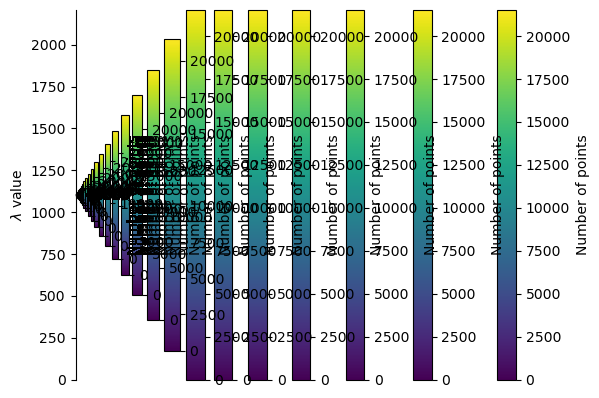

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from HDBSCAN import hdbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data_ecc.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

images_dir = "Images"
os.makedirs(images_dir, exist_ok=True)
plot_dir = os.path.join("Images", "hdbscan_simulations_running_bins_ecc")
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning HDBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_cluster_size_values = [10, 15]  
    min_samples_values = [None, 10] 
    cluster_selection_epsilon_values = [0.0, 0.1] 

    results = []

    for min_cluster_size in min_cluster_size_values: 
        for min_samples in min_samples_values:
            for cluster_selection_epsilon in cluster_selection_epsilon_values:

                result_hdbscan, time_hdbscan, n_clusters_hdbscan, points_per_cluster_hdbscan, metrics_hdbscan = run_clustering(
                    hdbscan_clustering, "HDBSCAN", normalized_data, data_min, data_max, min_cluster_size, min_samples, cluster_selection_epsilon, plot_condensed_tree=True, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_hdbscan.data, result_hdbscan.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_hdbscan.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"hdbscan_{year_range}_minclust{min_cluster_size}_minsamples{min_samples}_epsilon{cluster_selection_epsilon}.png")
                title = f"HDBSCAN: years = {year_range}, min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, epsilon: {cluster_selection_epsilon},"
                plotter.clusters_3d_plot(title, plot_filename)

                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_hdbscan[4].items()}

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_hdbscan,
                    "Runtime (s)": f"{time_hdbscan:.3f}",
                    "Clusters": n_clusters_hdbscan,
                    "Points per Cluster": points_per_cluster_hdbscan,
                    "Davies-Bouldin": f"{metrics_hdbscan[0]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_hdbscan[1]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_hdbscan[2]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_hdbscan[3]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)

# DENCLUE

In [ ]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from clustering_utils_ecc import ClusteringResult
from scipy.spatial.distance import cdist
from DENCLUE import denclue_clustering  # Import DENCLUE clustering function
from cluster_plotter import ClusterPlotter

# Same setup as before
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)
year_range = standard_year_ranges

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

plot_dir = "Images/denclue_simulations_normal_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DENCLUE for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    epsilon_vals = [1000, 1000, 1500]
    max_iter_vals = [5000, 7000, 9000]
    bandwidth_vals = [0.01, 0.02, 0.03]

    results = []

    for epsilon in epsilon_vals:
        for max_iter in max_iter_vals:
            for bandwidth in bandwidth_vals:
                result_denclue, time_denclue, n_clusters_denclue, points_per_cluster_denclue, metrics_denclue = run_clustering(denclue_clustering, "DENCLUE",
                    normalized_data, data_min, data_max, epsilon=epsilon, max_iter=max_iter, bandwidth=bandwidth, plot = False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_denclue.data, result_denclue.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_denclue.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"denclue_{year_range}_eps{epsilon}_maxiter{max_iter}_bandwidth{bandwidth}.png")
                title = f"DENCLUE: years = {year_range}, epsilon: {epsilon}, max_iter: {max_iter}, bandwidth: {bandwidth}"
                plotter.clusters_3d_plot(title, plot_filename)
                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_denclue[4].items()}
                rounded_square_density = {key: round(value, 3) for key, value in metrics_denclue[5].items()}
                rounded_hull_density = {key: round(value, 3) for key, value in metrics_denclue[6].items()}

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_denclue,
                    "Runtime (s)": f"{time_denclue:.3f}",
                    "Clusters": n_clusters_denclue,
                    "Points per Cluster": points_per_cluster_denclue,
                    "Davies-Bouldin": f"{metrics_denclue[0]:.3f}" if metrics_denclue and isinstance(metrics_denclue[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_denclue[1]:.3f}" if metrics_denclue and isinstance(metrics_denclue[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_denclue[2]:.3f}" if metrics_denclue and isinstance(metrics_denclue[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_denclue[3]:.3f}" if metrics_denclue and isinstance(metrics_denclue[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None,
                    "Square Density": rounded_square_density if rounded_square_density else None,
                    "Hull Density": rounded_hull_density if rounded_hull_density else None
                })

    df = pd.DataFrame(results)
    display(df)


Running DENCLUE for Year Range: 2002-2005

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:15<00:30, 15.41s/step]

Runtime for denclue_clustering: 15.411019 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:23<00:00,  7.93s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.01.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:15,  7.80s/step]

Runtime for denclue_clustering: 7.798340 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:25<00:00,  8.49s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.02.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:15<00:30, 15.46s/step]

Runtime for denclue_clustering: 15.462073 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:22<00:00,  7.62s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.03.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:14<00:29, 14.99s/step]

Runtime for denclue_clustering: 14.989034 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:23<00:00,  7.85s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.01.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:11<00:22, 11.14s/step]

Runtime for denclue_clustering: 11.135724 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:24<00:00,  8.32s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.02.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:08<00:16,  8.24s/step]

Runtime for denclue_clustering: 8.235285 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:15<00:00,  5.28s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.03.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:09<00:18,  9.29s/step]

Runtime for denclue_clustering: 9.288322 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.50s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.01.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:14<00:29, 14.60s/step]

Runtime for denclue_clustering: 14.596313 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:21<00:00,  7.32s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.02.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:14,  7.15s/step]

Runtime for denclue_clustering: 7.151666 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:13<00:00,  4.64s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.03.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:09<00:18,  9.17s/step]

Runtime for denclue_clustering: 9.170978 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.34s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.01_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.93s/step]

Runtime for denclue_clustering: 6.932172 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:17<00:00,  5.84s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.02_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.99s/step]

Runtime for denclue_clustering: 6.985583 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:14<00:00,  4.68s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.03_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:08<00:17,  8.90s/step]

Runtime for denclue_clustering: 8.901433 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.36s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.01_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.65s/step]

Runtime for denclue_clustering: 6.649680 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:13<00:00,  4.43s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.02_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.87s/step]

Runtime for denclue_clustering: 6.871814 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:13<00:00,  4.50s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.03_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:09<00:18,  9.48s/step]

Runtime for denclue_clustering: 9.479159 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.44s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.01_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:15,  7.59s/step]

Runtime for denclue_clustering: 7.594385 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:14<00:00,  4.85s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.02_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:14,  7.15s/step]

Runtime for denclue_clustering: 7.147622 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:14<00:00,  4.70s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.03_1.png

DENCLUE result:


Running DENCLUE: 100%|██████████| 3/3 [00:09<00:00,  3.06s/step]

Runtime for denclue_clustering: 9.165776 seconds


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1500_maxiter5000_bandwidth0.01.png


IndexError: list index out of range